In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score,cohen_kappa_score
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score,cohen_kappa_score


In [4]:
df = pd.read_csv('train_data.csv')
df.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [5]:
df.columns

Index(['UNIQUEID', 'DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'BRANCH_ID',
       'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID', 'DATE_OF_BIRTH',
       'EMPLOYMENT_TYPE', 'DISBURSAL_DATE', 'STATE_ID', 'EMPLOYEE_CODE_ID',
       'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG',
       'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE',
       'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS',
       'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT',
       'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS',
       'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT',
       'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT',
       'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES',
       'LOAN_DEFAULT'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UNIQUEID                             233154 non-null  int64  
 1   DISBURSED_AMOUNT                     233154 non-null  int64  
 2   ASSET_COST                           233154 non-null  int64  
 3   LTV                                  233154 non-null  float64
 4   BRANCH_ID                            233154 non-null  int64  
 5   SUPPLIER_ID                          233154 non-null  int64  
 6   MANUFACTURER_ID                      233154 non-null  int64  
 7   CURRENT_PINCODE_ID                   233154 non-null  int64  
 8   DATE_OF_BIRTH                        233154 non-null  object 
 9   EMPLOYMENT_TYPE                      225493 non-null  object 
 10  DISBURSAL_DATE                       233154 non-null  object 
 11  STATE_ID     

In [7]:
df['SUPPLIER_ID']= df['SUPPLIER_ID'].astype(object)
df['UNIQUEID']= df['UNIQUEID'].astype(object)
df['BRANCH_ID']= df['BRANCH_ID'].astype(object)
df['MANUFACTURER_ID']= df['MANUFACTURER_ID'].astype(object)
df['CURRENT_PINCODE_ID']= df['CURRENT_PINCODE_ID'].astype(object)
df['STATE_ID']= df['STATE_ID'].astype(object)
df['EMPLOYEE_CODE_ID']= df['EMPLOYEE_CODE_ID'].astype(object)
df['MOBILENO_AVL_FLAG']= df['MOBILENO_AVL_FLAG'].astype(object)
df['AADHAR_FLAG']= df['AADHAR_FLAG'].astype(object)
df['PAN_FLAG']= df['PAN_FLAG'].astype(object)
df['VOTERID_FLAG']= df['VOTERID_FLAG'].astype(object)
df['DRIVING_FLAG']= df['DRIVING_FLAG'].astype(object)
df['PASSPORT_FLAG']= df['PASSPORT_FLAG'].astype(object)
df['NEW_ACCTS_IN_LAST_SIX_MONTHS']= df['NEW_ACCTS_IN_LAST_SIX_MONTHS'].astype(object)
df['DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS']= df['DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS'].astype(object)
df['NO_OF_INQUIRIES']= df['NO_OF_INQUIRIES'].astype(object)
df['PRI_NO_OF_ACCTS']= df['PRI_NO_OF_ACCTS'].astype(object)
df['SEC_NO_OF_ACCTS']= df['PRI_NO_OF_ACCTS'].astype(object)
df['SEC_ACTIVE_ACCTS']=df['SEC_ACTIVE_ACCTS'].astype(object)
df['PRI_ACTIVE_ACCTS']= df['PRI_ACTIVE_ACCTS'].astype(object)
df['SEC_OVERDUE_ACCTS']= df['SEC_OVERDUE_ACCTS'].astype(object)
df['PRI_OVERDUE_ACCTS']= df['PRI_OVERDUE_ACCTS'].astype(object)
df['LOAN_DEFAULT']= df['LOAN_DEFAULT'].astype(object)

In [2]:
df.info()

NameError: name 'df' is not defined

In [9]:
 df[['AVERAGE_ACCT_AGE','CREDIT_HISTORY_LENGTH']].head()

,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH
0,0yrs 0mon,0yrs 0mon
1,1yrs 11mon,1yrs 11mon
2,0yrs 0mon,0yrs 0mon
3,0yrs 8mon,1yrs 3mon
4,0yrs 0mon,0yrs 0mon


In [10]:
import re
def to_yrs(s):
    nos = re.findall(r'(\d+)', string=s)
    yr = int(nos[0])
    mo = int(nos[1])
    return (yr * 12) + mo

In [11]:
df['AVERAGE_ACCT_AGE'] = df['AVERAGE_ACCT_AGE'].apply(lambda x: to_yrs(x))
df['CREDIT_HISTORY_LENGTH'] = df['CREDIT_HISTORY_LENGTH'].apply(lambda x: to_yrs(x))

In [12]:
df[['AVERAGE_ACCT_AGE','CREDIT_HISTORY_LENGTH']].head()

,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH
0,0,0
1,23,23
2,0,0
3,8,15
4,0,0


In [13]:
df.isnull().sum()

UNIQUEID                                  0
DISBURSED_AMOUNT                          0
ASSET_COST                                0
LTV                                       0
BRANCH_ID                                 0
SUPPLIER_ID                               0
MANUFACTURER_ID                           0
CURRENT_PINCODE_ID                        0
DATE_OF_BIRTH                             0
EMPLOYMENT_TYPE                        7661
DISBURSAL_DATE                            0
STATE_ID                                  0
EMPLOYEE_CODE_ID                          0
MOBILENO_AVL_FLAG                         0
AADHAR_FLAG                               0
PAN_FLAG                                  0
VOTERID_FLAG                              0
DRIVING_FLAG                              0
PASSPORT_FLAG                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                

# Missing Value Treatment

In [14]:
df['EMPLOYMENT_TYPE'].head()

0         Salaried
1    Self employed
2    Self employed
3    Self employed
4    Self employed
Name: EMPLOYMENT_TYPE, dtype: object

In [15]:
df['EMPLOYMENT_TYPE'].value_counts()

Self employed    127635
Salaried          97858
Name: EMPLOYMENT_TYPE, dtype: int64

In [16]:
df['EMPLOYMENT_TYPE'].value_counts(1)*100

Self employed    56.602644
Salaried         43.397356
Name: EMPLOYMENT_TYPE, dtype: float64

In [17]:
df['EMPLOYMENT_TYPE'].fillna('Not Known', inplace = True)

In [18]:
df['EMPLOYMENT_TYPE'].value_counts(1)*100

Self employed    54.742788
Salaried         41.971401
Not Known         3.285811
Name: EMPLOYMENT_TYPE, dtype: float64

In [19]:
df['DATE_OF_BIRTH'] = pd.to_datetime(df['DATE_OF_BIRTH'])

In [20]:
df['DISBURSAL_DATE'] = pd.to_datetime(df['DISBURSAL_DATE'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UNIQUEID                             233154 non-null  object        
 1   DISBURSED_AMOUNT                     233154 non-null  int64         
 2   ASSET_COST                           233154 non-null  int64         
 3   LTV                                  233154 non-null  float64       
 4   BRANCH_ID                            233154 non-null  object        
 5   SUPPLIER_ID                          233154 non-null  object        
 6   MANUFACTURER_ID                      233154 non-null  object        
 7   CURRENT_PINCODE_ID                   233154 non-null  object        
 8   DATE_OF_BIRTH                        233154 non-null  datetime64[ns]
 9   EMPLOYMENT_TYPE                      233154 non-null  object        
 

In [22]:
df[[ 'DATE_OF_BIRTH','DISBURSAL_DATE']].head()

,DATE_OF_BIRTH,DISBURSAL_DATE
0,1984-01-01,2018-03-08
1,1985-07-31,2018-09-26
2,1985-08-24,2018-01-08
3,1993-12-30,2018-10-26
4,1977-09-12,2018-09-26


In [23]:
now = pd.to_datetime('now')
df['AGE']=(now.year - df['DATE_OF_BIRTH'].dt.year)
df['LOAN_AGE']=(now.year - df['DISBURSAL_DATE'].dt.year)

In [24]:
df = df.drop(['DATE_OF_BIRTH','DISBURSAL_DATE'], axis=1)

In [25]:
df.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,EMPLOYMENT_TYPE,STATE_ID,...,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,AGE,LOAN_AGE
0,420825,50578,58400,89.55,67,22807,45,1441,Salaried,6,...,0,0,0,0,0,0,0,0,37,3
1,537409,47145,65550,73.23,67,22807,45,1502,Self employed,6,...,1991,0,0,1,23,23,0,1,36,3
2,417566,53278,61360,89.63,67,22807,45,1497,Self employed,6,...,0,0,0,0,0,0,0,0,36,3
3,624493,57513,66113,88.48,67,22807,45,1501,Self employed,6,...,31,0,0,0,8,15,1,1,28,3
4,539055,52378,60300,88.39,67,22807,45,1495,Self employed,6,...,0,0,0,0,0,0,1,1,44,3


In [26]:
dfn = df.select_dtypes(include = np.number)
dfn.columns

Index(['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'PERFORM_CNS_SCORE',
       'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT',
       'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT',
       'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'AVERAGE_ACCT_AGE',
       'CREDIT_HISTORY_LENGTH', 'AGE', 'LOAN_AGE'],
      dtype='object')

In [27]:
df_cat = df.select_dtypes(include = object)
df_cat.columns

Index(['UNIQUEID', 'BRANCH_ID', 'SUPPLIER_ID', 'MANUFACTURER_ID',
       'CURRENT_PINCODE_ID', 'EMPLOYMENT_TYPE', 'STATE_ID', 'EMPLOYEE_CODE_ID',
       'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG',
       'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE_DESCRIPTION',
       'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS',
       'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS',
       'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'NO_OF_INQUIRIES', 'LOAN_DEFAULT'],
      dtype='object')

In [28]:
df['LOAN_DEFAULT'].value_counts()

0    182543
1     50611
Name: LOAN_DEFAULT, dtype: int64

In [29]:
df['LOAN_DEFAULT'].value_counts(1)*100

0    78.292888
1    21.707112
Name: LOAN_DEFAULT, dtype: float64

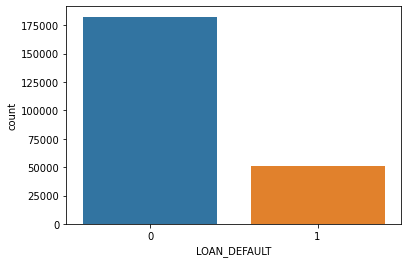

In [30]:
sns.countplot(df['LOAN_DEFAULT'])
plt.show()

In [31]:
def analyze_univariate_num(x):
    print(x.describe())
    f, (ax_box, ax_dist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(x,ax=ax_box)
    sns.distplot(x,ax=ax_dist)
    plt.axvline(x.mean(), color='r')
    plt.axvline(x.median(),color='g')
    print("Skewness:",x.skew())
    print("Kurtosis:",x.kurt())
    print("Shapiro Result:", stats.shapiro(x))

count    2.331540e+05
mean     7.586507e+04
std      1.894478e+04
min      3.700000e+04
25%      6.571700e+04
50%      7.094600e+04
75%      7.920175e+04
max      1.628992e+06
Name: ASSET_COST, dtype: float64
Skewness: 6.133485335511084
Kurtosis: 291.49393926915474
Shapiro Result: ShapiroResult(statistic=0.7476165294647217, pvalue=0.0)


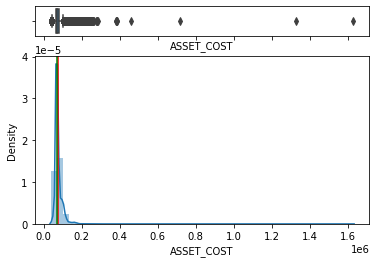

In [32]:
analyze_univariate_num(df['ASSET_COST'])

count    233154.000000
mean      54356.993528
std       12971.314171
min       13320.000000
25%       47145.000000
50%       53803.000000
75%       60413.000000
max      990572.000000
Name: DISBURSED_AMOUNT, dtype: float64
Skewness: 4.4922396638902455
Kurtosis: 249.9892735051841
Shapiro Result: ShapiroResult(statistic=0.9064337611198425, pvalue=0.0)


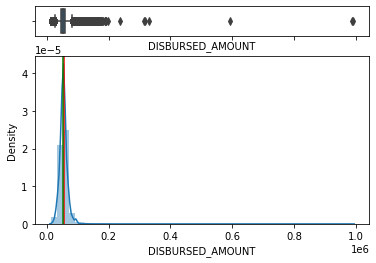

In [33]:
analyze_univariate_num(df['DISBURSED_AMOUNT'])

count    233154.000000
mean         74.746530
std          11.456636
min          10.030000
25%          68.880000
50%          76.800000
75%          83.670000
max          95.000000
Name: LTV, dtype: float64
Skewness: -1.0757660644024252
Kurtosis: 1.293927649863921
Shapiro Result: ShapiroResult(statistic=0.9295822978019714, pvalue=0.0)


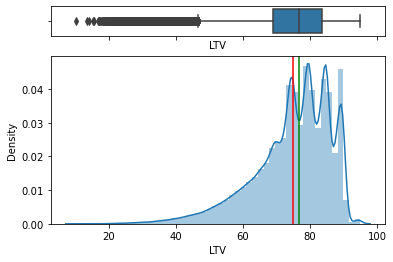

In [34]:
analyze_univariate_num(df['LTV'])

count    233154.000000
mean        289.462994
std         338.374779
min           0.000000
25%           0.000000
50%           0.000000
75%         678.000000
max         890.000000
Name: PERFORM_CNS_SCORE, dtype: float64
Skewness: 0.44515046415251963
Kurtosis: -1.6352575159541496
Shapiro Result: ShapiroResult(statistic=0.7317906618118286, pvalue=0.0)


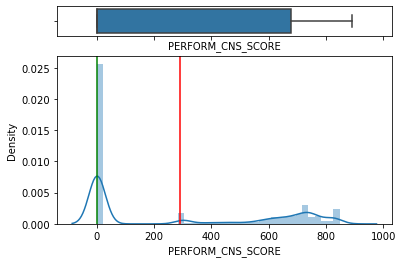

In [35]:
analyze_univariate_num(df['PERFORM_CNS_SCORE'])

count    2.331540e+05
mean     1.659001e+05
std      9.422736e+05
min     -6.678296e+06
25%      0.000000e+00
50%      0.000000e+00
75%      3.500650e+04
max      9.652492e+07
Name: PRI_CURRENT_BALANCE, dtype: float64
Skewness: 29.425813246411217
Kurtosis: 1616.8179181416458
Shapiro Result: ShapiroResult(statistic=0.1443611979484558, pvalue=0.0)


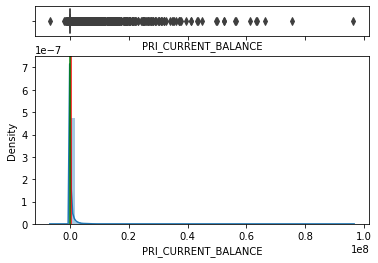

In [36]:
analyze_univariate_num(df['PRI_CURRENT_BALANCE'])

count    2.331540e+05
mean     2.185039e+05
std      2.374794e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      6.250000e+04
max      1.000000e+09
Name: PRI_SANCTIONED_AMOUNT, dtype: float64
Skewness: 323.69721207047996
Kurtosis: 134834.04109323866
Shapiro Result: ShapiroResult(statistic=0.03865158557891846, pvalue=0.0)


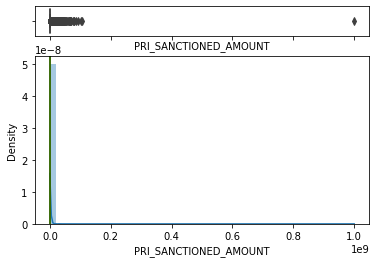

In [37]:
analyze_univariate_num(df['PRI_SANCTIONED_AMOUNT'])

count    2.331540e+05
mean     2.180659e+05
std      2.377744e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      6.080000e+04
max      1.000000e+09
Name: PRI_DISBURSED_AMOUNT, dtype: float64
Skewness: 322.54149451016895
Kurtosis: 134167.24762631077
Shapiro Result: ShapiroResult(statistic=0.038594067096710205, pvalue=0.0)


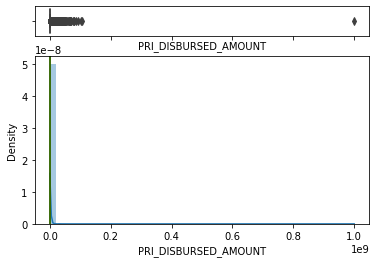

In [38]:
analyze_univariate_num(df['PRI_DISBURSED_AMOUNT'])

count    2.331540e+05
mean     5.427793e+03
std      1.702370e+05
min     -5.746470e+05
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.603285e+07
Name: SEC_CURRENT_BALANCE, dtype: float64
Skewness: 108.50629520825572
Kurtosis: 17243.66321838414
Shapiro Result: ShapiroResult(statistic=0.01130765676498413, pvalue=0.0)


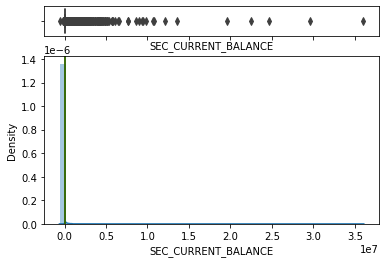

In [39]:
analyze_univariate_num(df['SEC_CURRENT_BALANCE'])

count    2.331540e+05
mean     7.295923e+03
std      1.831560e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.000000e+07
Name: SEC_SANCTIONED_AMOUNT, dtype: float64
Skewness: 75.25493196054575
Kurtosis: 8673.756764664347
Shapiro Result: ShapiroResult(statistic=0.0165671706199646, pvalue=0.0)


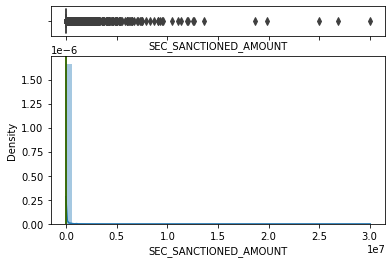

In [40]:
analyze_univariate_num(df['SEC_SANCTIONED_AMOUNT'])

count    2.331540e+05
mean     7.179998e+03
std      1.825925e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.000000e+07
Name: SEC_DISBURSED_AMOUNT, dtype: float64
Skewness: 75.7642519110728
Kurtosis: 8773.794347620442
Shapiro Result: ShapiroResult(statistic=0.01623302698135376, pvalue=0.0)


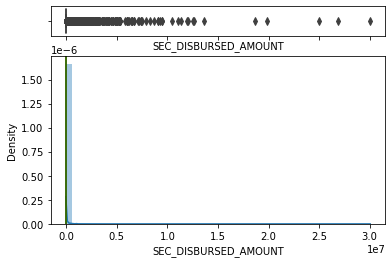

In [41]:
analyze_univariate_num(df['SEC_DISBURSED_AMOUNT'])

count    2.331540e+05
mean     1.310548e+04
std      1.513679e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.999000e+03
max      2.564281e+07
Name: PRIMARY_INSTAL_AMT, dtype: float64
Skewness: 69.91615647288437
Kurtosis: 8165.596600585326
Shapiro Result: ShapiroResult(statistic=0.048932015895843506, pvalue=0.0)


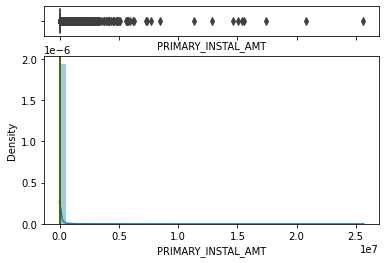

In [42]:
analyze_univariate_num(df['PRIMARY_INSTAL_AMT'])

count    2.331540e+05
mean     3.232684e+02
std      1.555369e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.170901e+06
Name: SEC_INSTAL_AMT, dtype: float64
Skewness: 153.80636894374445
Kurtosis: 33069.8145751019
Shapiro Result: ShapiroResult(statistic=0.005436897277832031, pvalue=0.0)


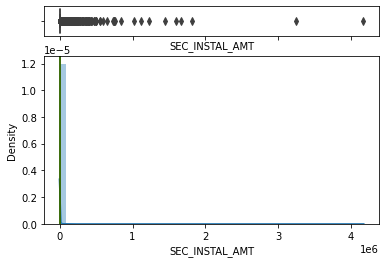

In [43]:
analyze_univariate_num(df['SEC_INSTAL_AMT'])

count    233154.000000
mean          8.915764
std          15.106416
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max         369.000000
Name: AVERAGE_ACCT_AGE, dtype: float64
Skewness: 3.285142284503406
Kurtosis: 18.62272681437511
Shapiro Result: ShapiroResult(statistic=0.636578381061554, pvalue=0.0)


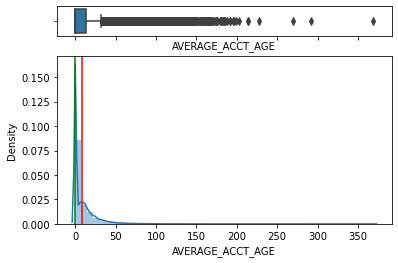

In [44]:
analyze_univariate_num(df['AVERAGE_ACCT_AGE'])

count    233154.000000
mean         16.252404
std          28.581255
min           0.000000
25%           0.000000
50%           0.000000
75%          24.000000
max         468.000000
Name: CREDIT_HISTORY_LENGTH, dtype: float64
Skewness: 2.9691554540184018
Kurtosis: 12.274603911347075
Shapiro Result: ShapiroResult(statistic=0.6258162260055542, pvalue=0.0)


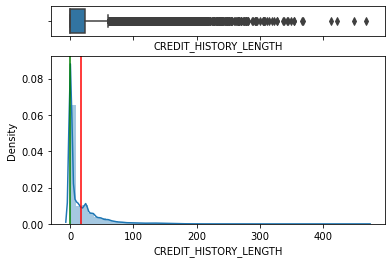

In [45]:
analyze_univariate_num(df['CREDIT_HISTORY_LENGTH'])

count    233154.000000
mean         37.100946
std           9.805992
min          21.000000
25%          29.000000
50%          35.000000
75%          44.000000
max          72.000000
Name: AGE, dtype: float64
Skewness: 0.6108401683672113
Kurtosis: -0.4478776785914822
Shapiro Result: ShapiroResult(statistic=0.9504475593566895, pvalue=0.0)


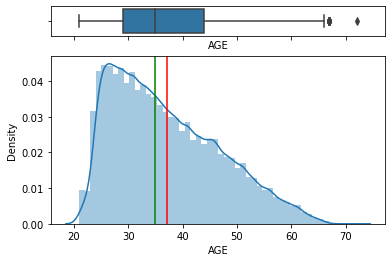

In [46]:
analyze_univariate_num(df['AGE'])

count    233154.0
mean          3.0
std           0.0
min           3.0
25%           3.0
50%           3.0
75%           3.0
max           3.0
Name: LOAN_AGE, dtype: float64
Skewness: 0
Kurtosis: 0
Shapiro Result: ShapiroResult(statistic=1.0, pvalue=1.0)


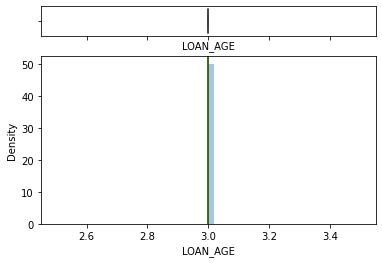

In [47]:
analyze_univariate_num(df['LOAN_AGE'])

In [48]:
plt.rcParams['figure.figsize']=[16,7]

In [49]:
def analyze_univariate_categ(x):
    print(x.value_counts(normalize=True))
    sns.histplot(x)
    plt.show()

524287    0.000004
603010    0.000004
603036    0.000004
603035    0.000004
603034    0.000004
            ...   
445276    0.000004
445275    0.000004
445274    0.000004
445273    0.000004
524288    0.000004
Name: UNIQUEID, Length: 233154, dtype: float64


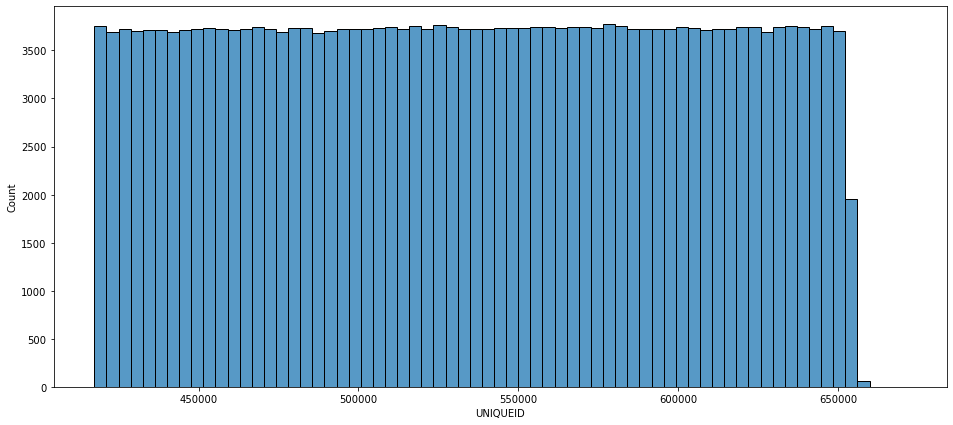

In [50]:
analyze_univariate_categ(df['UNIQUEID'])

2      0.056349
67     0.048586
3      0.039588
5      0.039536
36     0.037881
         ...   
217    0.000785
261    0.000755
84     0.000669
111    0.000382
158    0.000296
Name: BRANCH_ID, Length: 82, dtype: float64


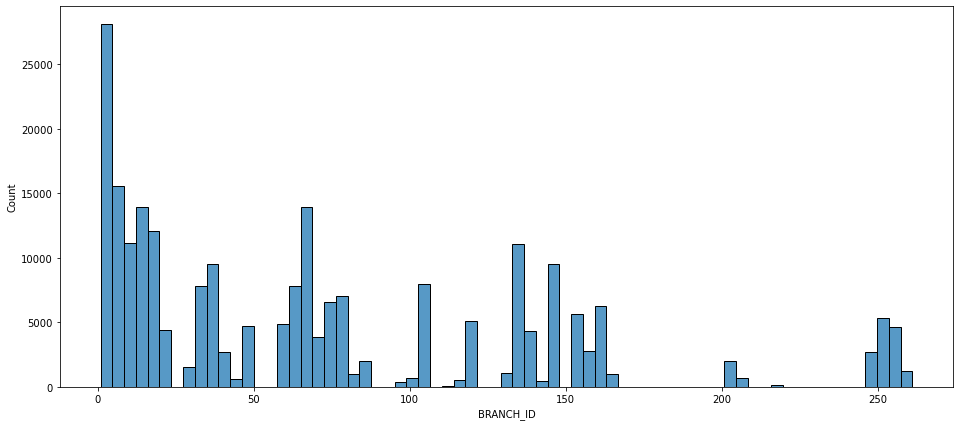

In [51]:
analyze_univariate_categ(df['BRANCH_ID'])

18317    0.006142
15694    0.005576
15663    0.005468
17980    0.005438
14234    0.005396
           ...   
24435    0.000004
24447    0.000004
16270    0.000004
24462    0.000004
24443    0.000004
Name: SUPPLIER_ID, Length: 2953, dtype: float64


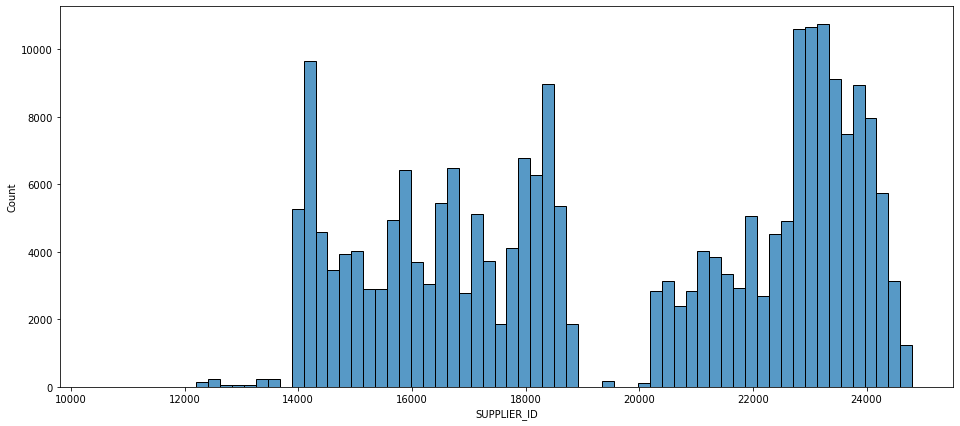

In [52]:
analyze_univariate_categ(df['SUPPLIER_ID'])

86     0.469792
45     0.242870
51     0.116678
48     0.071669
49     0.043834
120    0.041423
67     0.010315
145    0.003337
153    0.000051
152    0.000026
156    0.000004
Name: MANUFACTURER_ID, dtype: float64


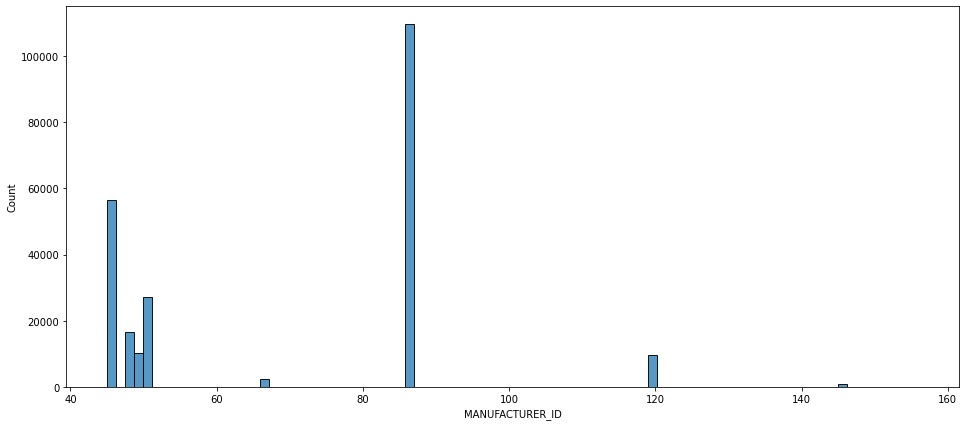

In [53]:
analyze_univariate_categ(df['MANUFACTURER_ID'])

2578    0.008063
1446    0.007424
1515    0.004662
2989    0.004006
2943    0.003856
          ...   
4151    0.000004
4149    0.000004
4148    0.000004
4147    0.000004
4108    0.000004
Name: CURRENT_PINCODE_ID, Length: 6698, dtype: float64


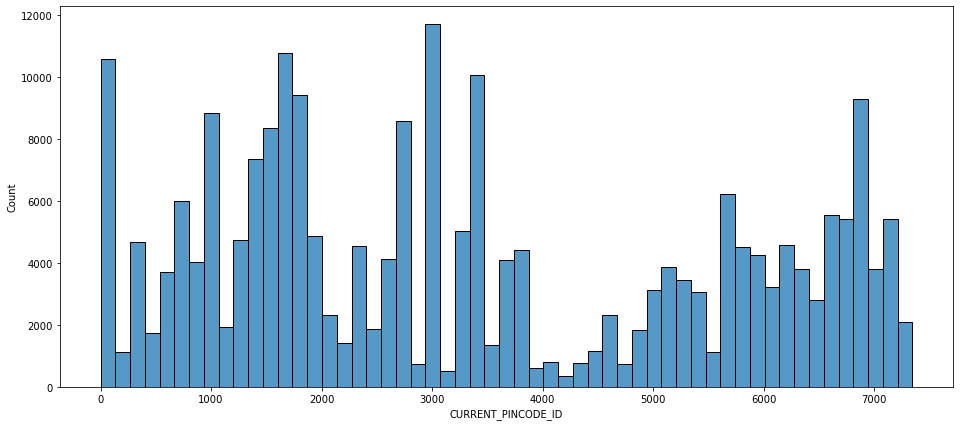

In [54]:
analyze_univariate_categ(df['CURRENT_PINCODE_ID'])

Self employed    0.547428
Salaried         0.419714
Not Known        0.032858
Name: EMPLOYMENT_TYPE, dtype: float64


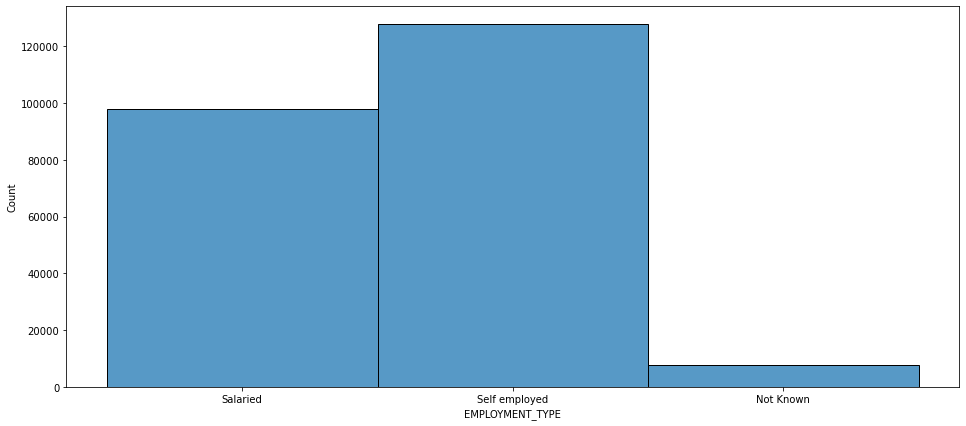

In [55]:
analyze_univariate_categ(df['EMPLOYMENT_TYPE'])

4     0.192448
3     0.146161
6     0.143703
13    0.076705
9     0.068719
8     0.060891
5     0.043649
14    0.040377
1     0.038327
7     0.029105
11    0.028826
18    0.023212
15    0.021655
12    0.018057
2     0.017842
17    0.017117
10    0.015462
16    0.011516
19    0.004439
20    0.000793
21    0.000669
22    0.000326
Name: STATE_ID, dtype: float64


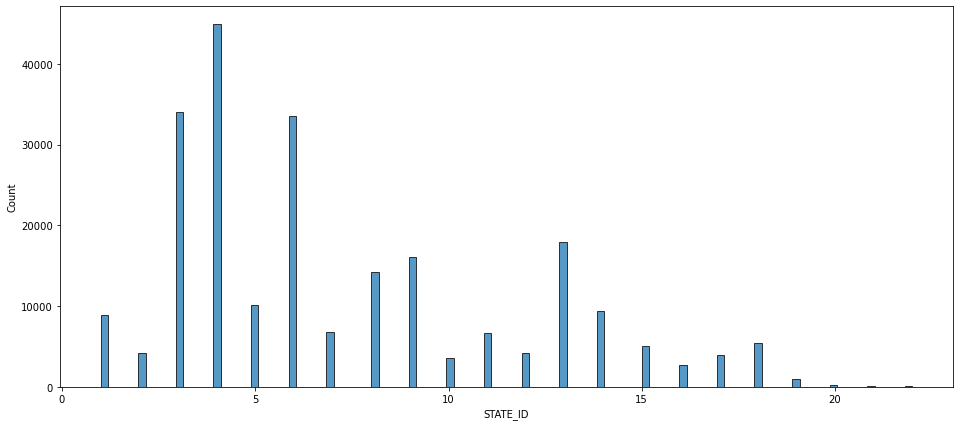

In [56]:
analyze_univariate_categ(df['STATE_ID'])

2546    0.002693
620     0.002153
255     0.002119
130     0.001750
2153    0.001720
          ...   
3772    0.000004
115     0.000004
2166    0.000004
2875    0.000004
3795    0.000004
Name: EMPLOYEE_CODE_ID, Length: 3270, dtype: float64


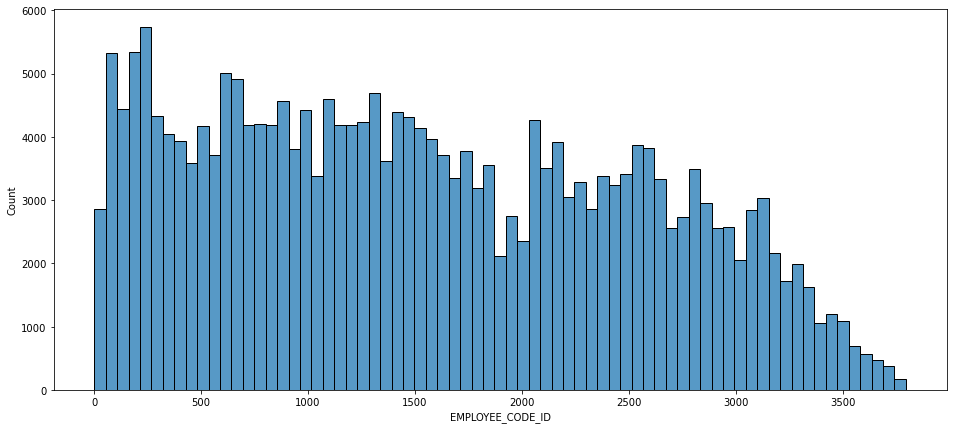

In [57]:
analyze_univariate_categ(df['EMPLOYEE_CODE_ID'])

In [58]:
def analyze_univariate_cat(x):
    print(x.value_counts(normalize=True))
    sns.countplot(x)
    plt.show()


0      0.501600
1      0.150021
2      0.084854
3      0.055821
4      0.039986
         ...   
99     0.000004
88     0.000004
86     0.000004
85     0.000004
453    0.000004
Name: PRI_NO_OF_ACCTS, Length: 108, dtype: float64


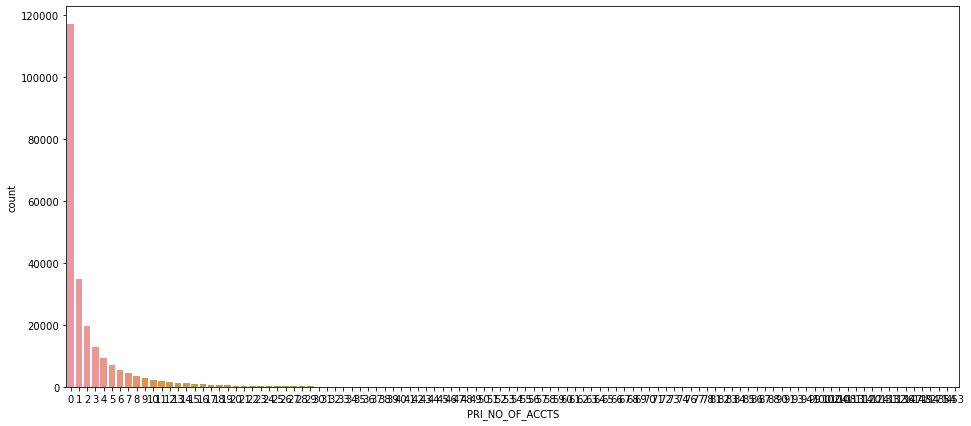

In [59]:
analyze_univariate_cat(df['PRI_NO_OF_ACCTS'])

0      0.587663
1      0.180374
2      0.092424
3      0.052618
4      0.031996
5      0.019481
6      0.011958
7      0.007699
8      0.005155
9      0.003242
10     0.002209
11     0.001415
12     0.000982
13     0.000759
14     0.000515
15     0.000412
17     0.000232
16     0.000227
18     0.000142
19     0.000116
20     0.000056
22     0.000043
23     0.000043
24     0.000043
21     0.000039
25     0.000030
26     0.000026
28     0.000021
27     0.000013
31     0.000009
32     0.000009
34     0.000009
35     0.000009
37     0.000009
43     0.000004
52     0.000004
65     0.000004
42     0.000004
39     0.000004
144    0.000004
Name: PRI_ACTIVE_ACCTS, dtype: float64


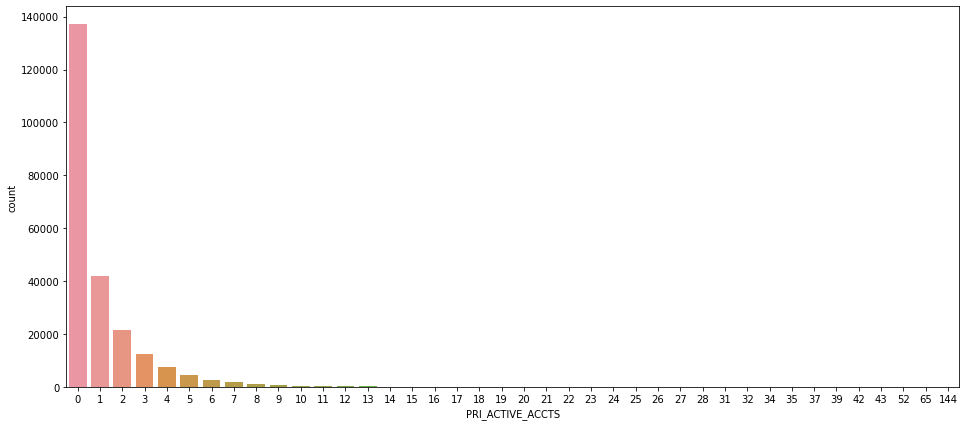

In [60]:
analyze_univariate_cat(df['PRI_ACTIVE_ACCTS'])

0     0.887306
1     0.085652
2     0.018451
3     0.005155
4     0.001733
5     0.000712
6     0.000412
7     0.000163
8     0.000116
9     0.000107
11    0.000051
12    0.000034
10    0.000026
13    0.000021
14    0.000021
17    0.000009
18    0.000009
23    0.000004
15    0.000004
16    0.000004
19    0.000004
25    0.000004
Name: PRI_OVERDUE_ACCTS, dtype: float64


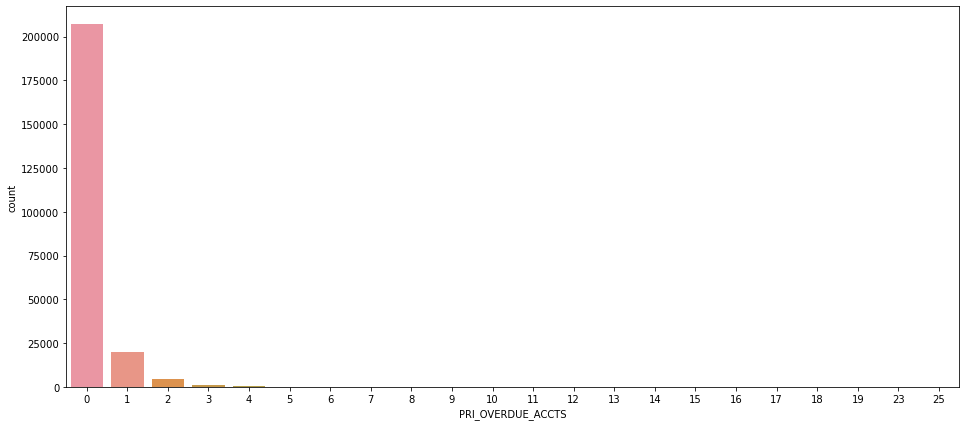

In [61]:
analyze_univariate_cat(df['PRI_OVERDUE_ACCTS'])

0      0.501600
1      0.150021
2      0.084854
3      0.055821
4      0.039986
         ...   
99     0.000004
88     0.000004
86     0.000004
85     0.000004
453    0.000004
Name: SEC_NO_OF_ACCTS, Length: 108, dtype: float64


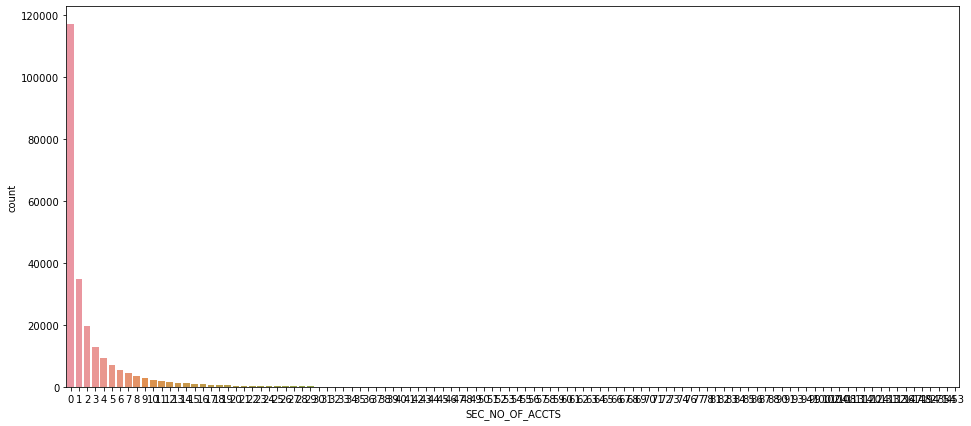

In [62]:
analyze_univariate_cat(df['SEC_NO_OF_ACCTS'])

0     0.983629
1     0.011512
2     0.002728
3     0.000836
4     0.000498
5     0.000279
6     0.000137
7     0.000094
8     0.000073
9     0.000047
10    0.000039
11    0.000030
12    0.000026
15    0.000017
13    0.000013
16    0.000009
22    0.000009
26    0.000004
14    0.000004
17    0.000004
20    0.000004
21    0.000004
36    0.000004
Name: SEC_ACTIVE_ACCTS, dtype: float64


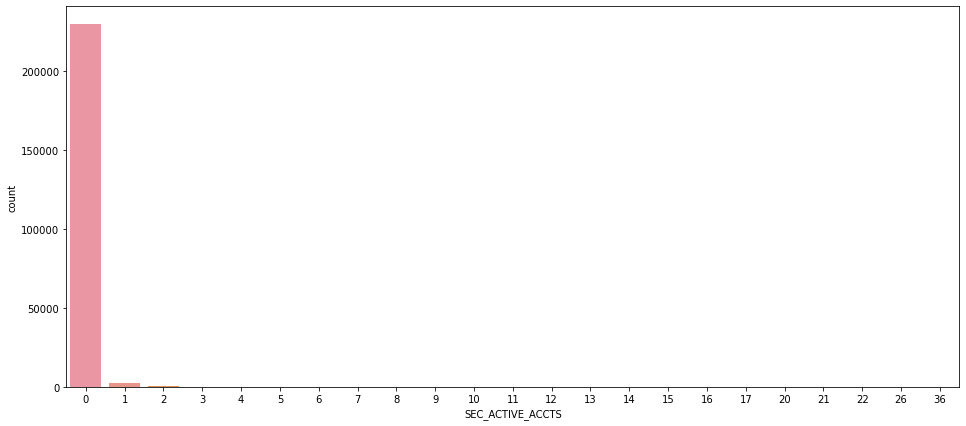

In [63]:
analyze_univariate_cat(df['SEC_ACTIVE_ACCTS'])

0    0.994266
1    0.004842
2    0.000540
3    0.000202
4    0.000081
5    0.000034
6    0.000026
8    0.000004
7    0.000004
Name: SEC_OVERDUE_ACCTS, dtype: float64


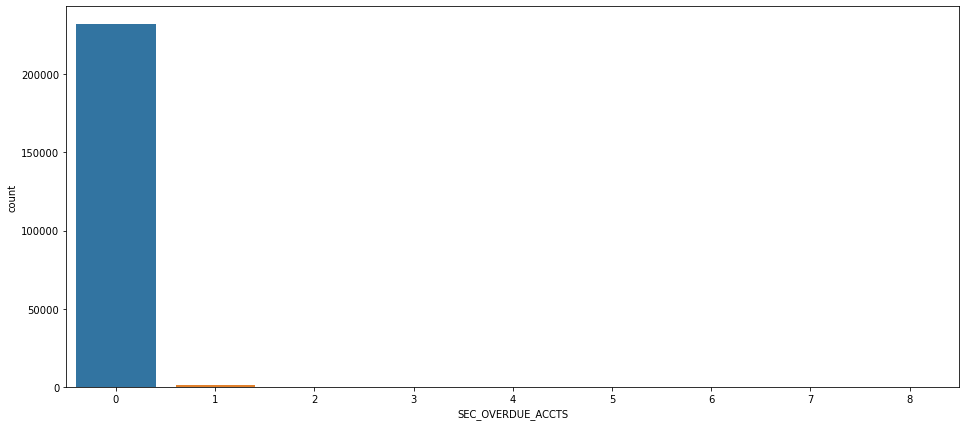

In [64]:
analyze_univariate_cat(df['SEC_OVERDUE_ACCTS'])

0     0.778430
1     0.137673
2     0.047243
3     0.019120
4     0.008394
5     0.004135
6     0.002059
7     0.001295
8     0.000630
9     0.000339
10    0.000236
11    0.000133
12    0.000086
13    0.000064
14    0.000047
16    0.000026
17    0.000026
20    0.000013
15    0.000009
18    0.000009
19    0.000009
23    0.000009
28    0.000004
21    0.000004
22    0.000004
35    0.000004
Name: NEW_ACCTS_IN_LAST_SIX_MONTHS, dtype: float64


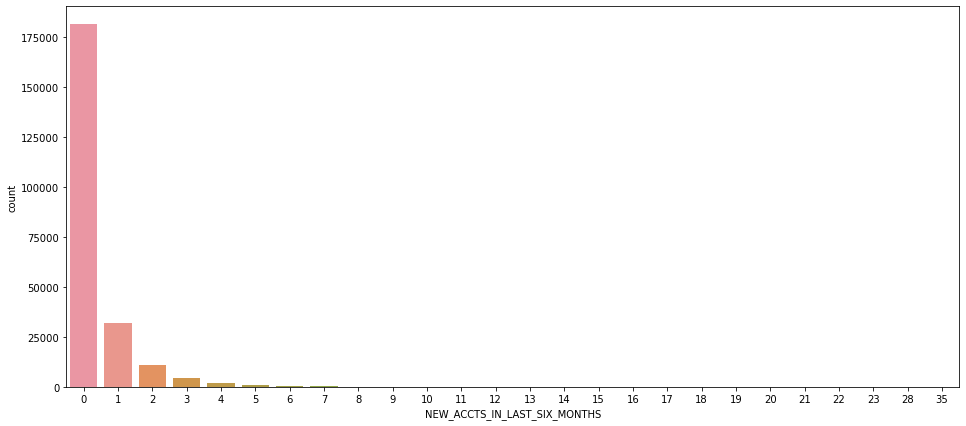

In [65]:
analyze_univariate_cat(df['NEW_ACCTS_IN_LAST_SIX_MONTHS'])

0     0.921961
1     0.064082
2     0.010594
3     0.002303
4     0.000592
5     0.000249
6     0.000086
7     0.000056
8     0.000030
12    0.000013
11    0.000013
10    0.000009
9     0.000009
20    0.000004
Name: DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS, dtype: float64


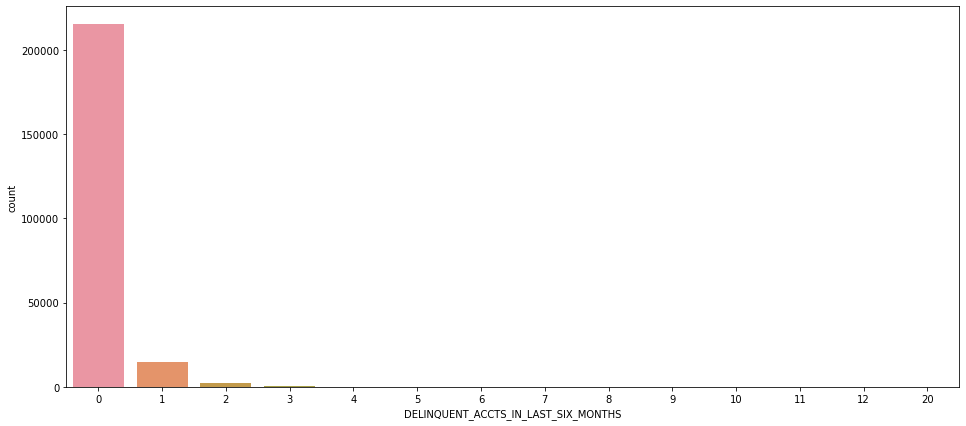

In [66]:
analyze_univariate_cat(df['DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS'])

0     0.866213
1     0.095581
2     0.023199
3     0.007579
4     0.003260
5     0.001471
6     0.001025
7     0.000579
8     0.000450
9     0.000189
10    0.000146
11    0.000064
12    0.000060
14    0.000034
15    0.000030
13    0.000026
19    0.000026
17    0.000017
18    0.000017
16    0.000013
28    0.000004
20    0.000004
22    0.000004
23    0.000004
36    0.000004
Name: NO_OF_INQUIRIES, dtype: float64


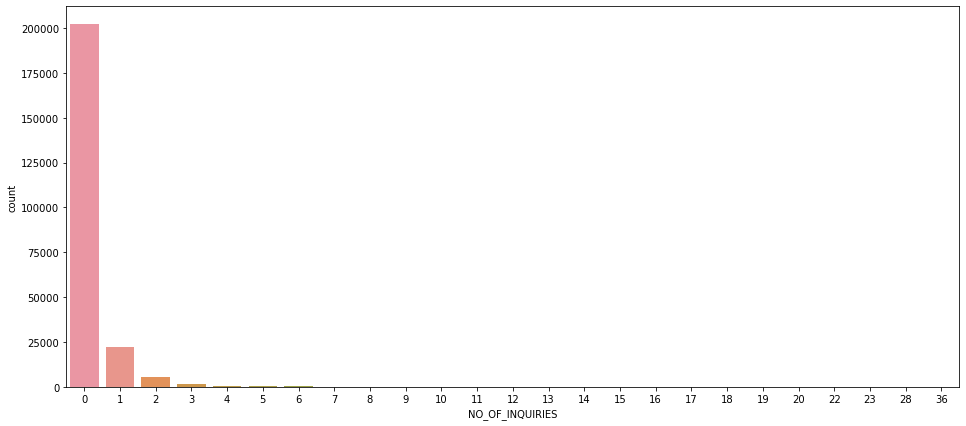

In [67]:
analyze_univariate_cat(df['NO_OF_INQUIRIES'])

0    0.782929
1    0.217071
Name: LOAN_DEFAULT, dtype: float64


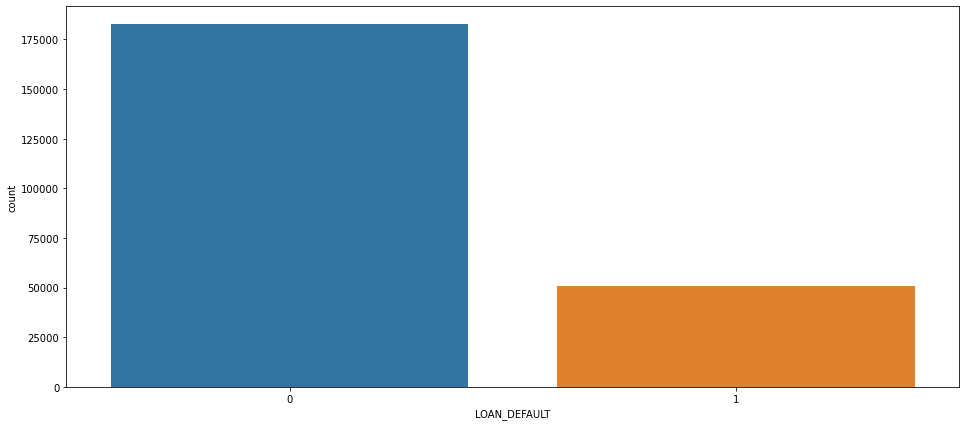

In [68]:
analyze_univariate_cat(df['LOAN_DEFAULT'])

1    1.0
Name: MOBILENO_AVL_FLAG, dtype: float64


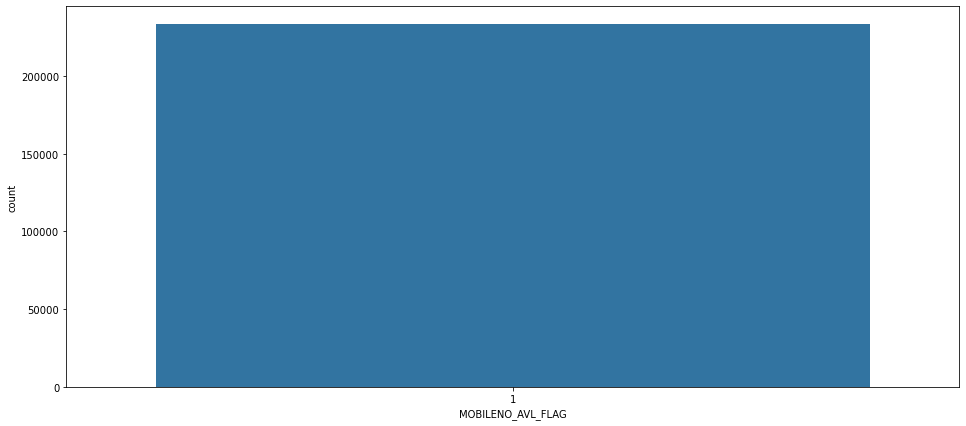

In [69]:
analyze_univariate_cat(df['MOBILENO_AVL_FLAG'])

1    0.84032
0    0.15968
Name: AADHAR_FLAG, dtype: float64


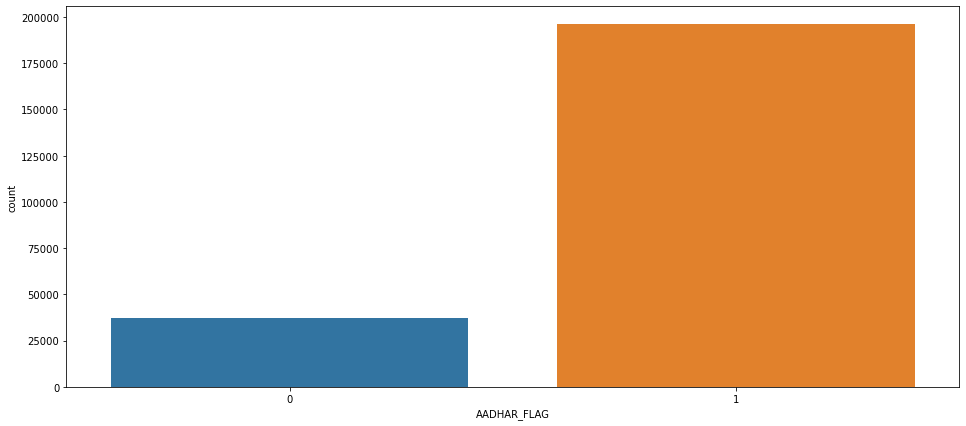

In [70]:
analyze_univariate_cat(df['AADHAR_FLAG'])

0    0.924423
1    0.075577
Name: PAN_FLAG, dtype: float64


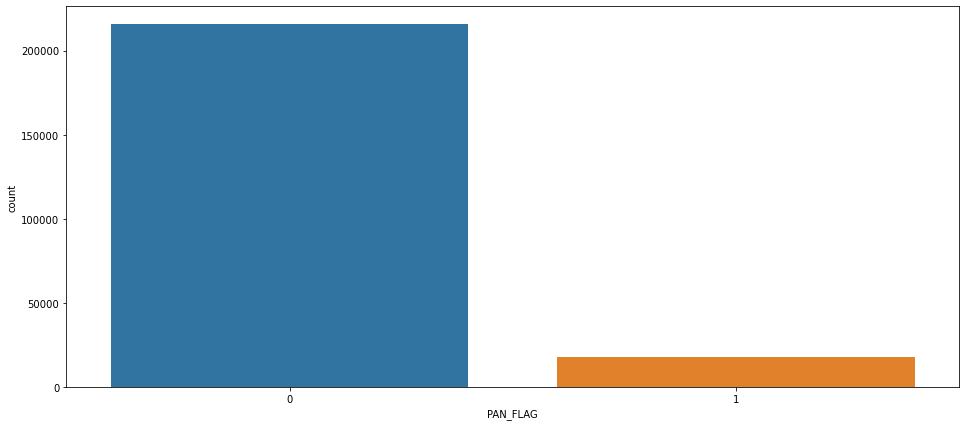

In [71]:
analyze_univariate_cat(df['PAN_FLAG'])

0    0.855057
1    0.144943
Name: VOTERID_FLAG, dtype: float64


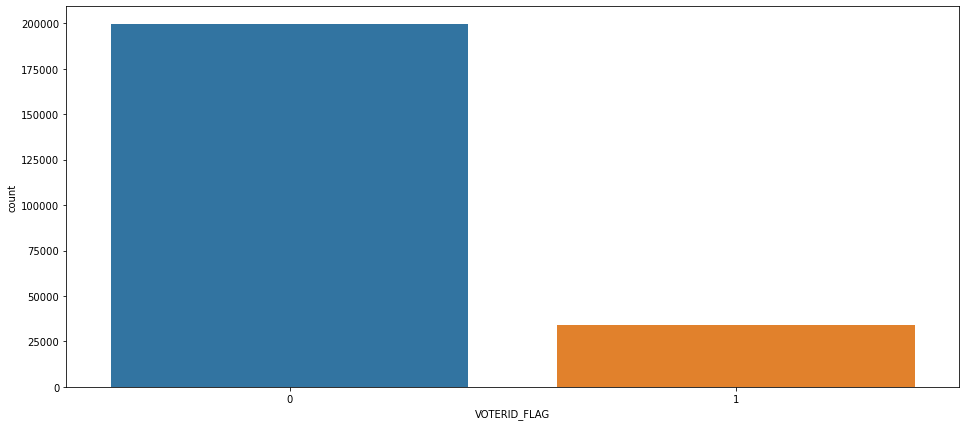

In [72]:
analyze_univariate_cat(df['VOTERID_FLAG'])

0    0.976758
1    0.023242
Name: DRIVING_FLAG, dtype: float64


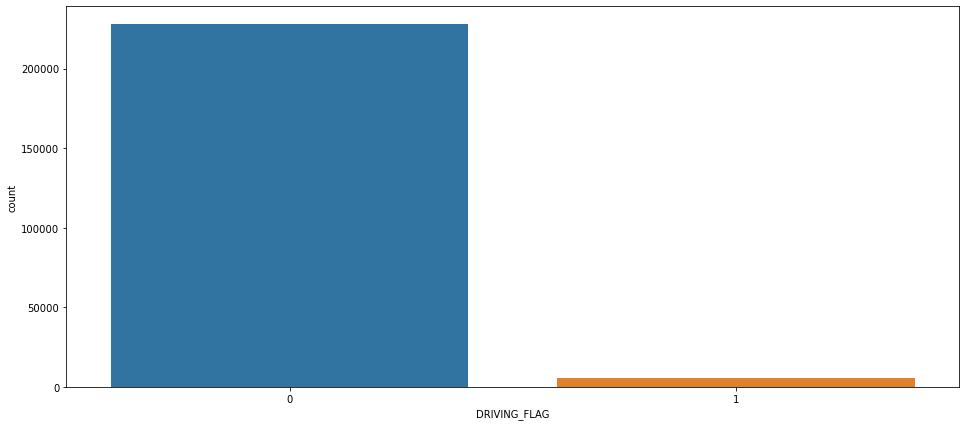

In [73]:
analyze_univariate_cat(df['DRIVING_FLAG'])

0    0.997873
1    0.002127
Name: PASSPORT_FLAG, dtype: float64


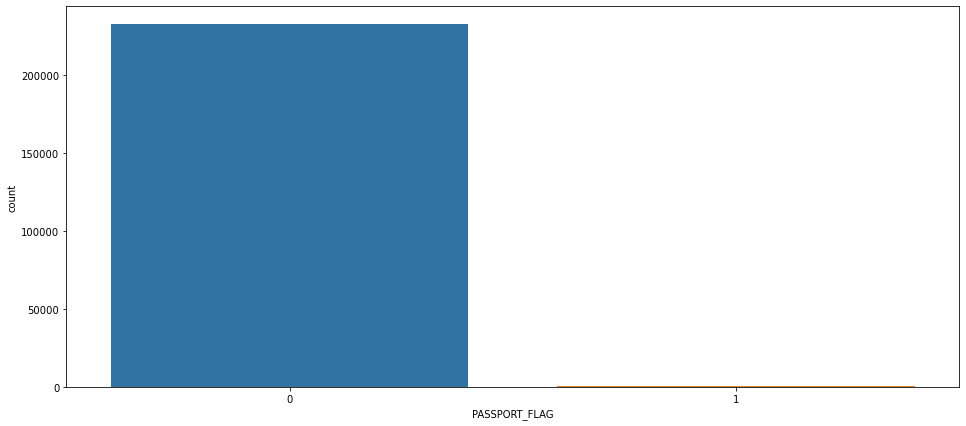

In [74]:
analyze_univariate_cat(df['PASSPORT_FLAG'])

No Bureau History Available                                0.501600
C-Very Low Risk                                            0.068817
A-Very Low Risk                                            0.060578
D-Very Low Risk                                            0.048715
B-Very Low Risk                                            0.039463
M-Very High Risk                                           0.037640
F-Low Risk                                                 0.036392
K-High Risk                                                0.035500
H-Medium Risk                                              0.029401
E-Low Risk                                                 0.024966
I-Medium Risk                                              0.023834
G-Low Risk                                                 0.017105
Not Scored: Sufficient History Not Available               0.016148
J-High Risk                                                0.016075
Not Scored: Not Enough Info available on the cus

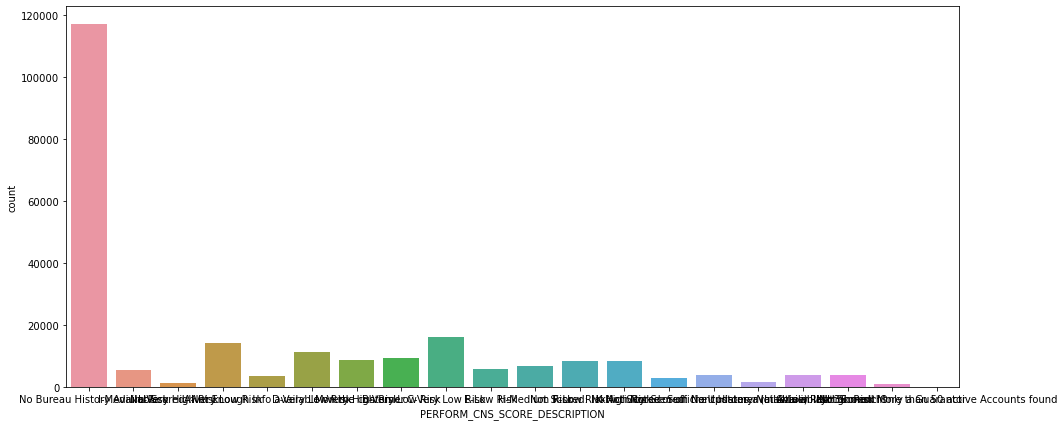

In [75]:
analyze_univariate_cat(df['PERFORM_CNS_SCORE_DESCRIPTION'])

# Bivariate Classication and Statistacal Test Results

In [76]:
from scipy.stats import chi2_contingency

In [77]:
def analyze_bivariate_cat_cat(x):
    print("Statistical test used: Chi_2 contingency")
    table = pd.crosstab(df[x],df['LOAN_DEFAULT'])
    observed_value= table.values
    hypo_test =chi2_contingency(observed=observed_value)
    print("pvalue:", hypo_test[1])
    if hypo_test[1]>0.05:
        print("The attribute:",x,"is independent on LOAN_DEFAULT")
    else:
        print("The attributes:",x,"is dependent on LOAN_DEFAULT")
        
    print("")
    print("BIVARIATE PLOTS: LOAN_DEFAULT Vs",x)
    pd.crosstab(df[x],df['LOAN_DEFAULT']).plot(kind='bar',)
    plt.show()
    #dff = df.loc[:,['loan_status',x]]
    #dff = pd.get_dummies(dff, drop_first=True)
    #sns.heatmap(dff.corr(), annot=True)
    #plt.show()

Statistical test used: Chi_2 contingency
pvalue: 0.0
The attributes: LOAN_DEFAULT is dependent on LOAN_DEFAULT

BIVARIATE PLOTS: LOAN_DEFAULT Vs LOAN_DEFAULT


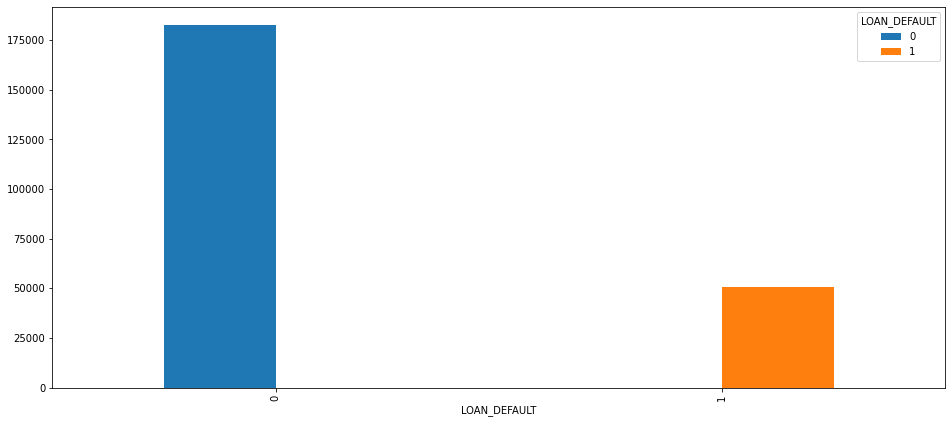

In [78]:
analyze_bivariate_cat_cat('LOAN_DEFAULT')

Statistical test used: Chi_2 contingency
pvalue: 2.366614253991536e-46
The attributes: NEW_ACCTS_IN_LAST_SIX_MONTHS is dependent on LOAN_DEFAULT

BIVARIATE PLOTS: LOAN_DEFAULT Vs NEW_ACCTS_IN_LAST_SIX_MONTHS


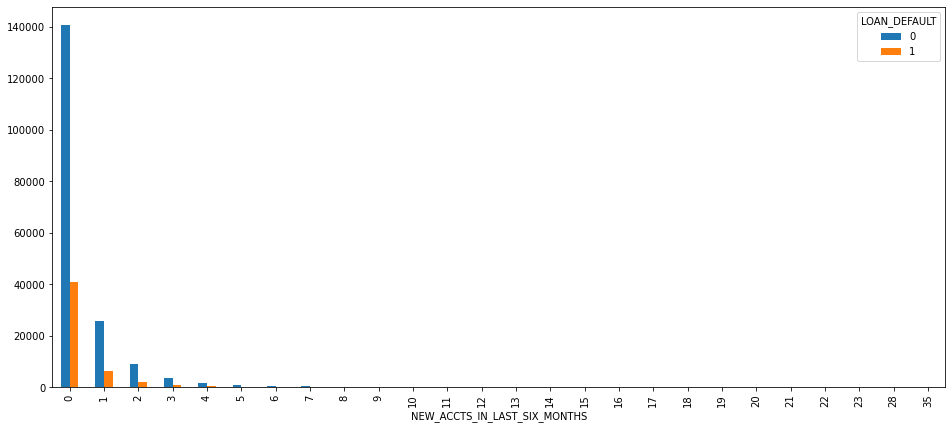

In [79]:
analyze_bivariate_cat_cat('NEW_ACCTS_IN_LAST_SIX_MONTHS')

Statistical test used: Chi_2 contingency
pvalue: 2.528828589523959e-66
The attributes: DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS is dependent on LOAN_DEFAULT

BIVARIATE PLOTS: LOAN_DEFAULT Vs DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS


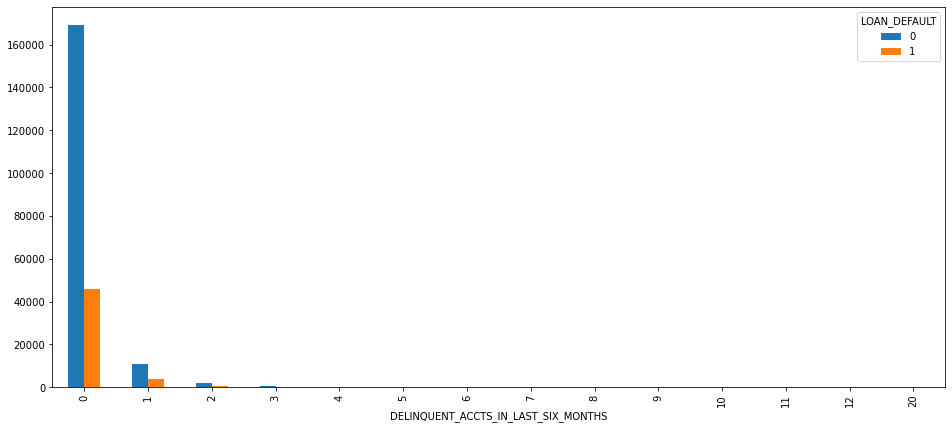

In [80]:
analyze_bivariate_cat_cat('DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS')

Statistical test used: Chi_2 contingency
pvalue: 0.0
The attributes: PERFORM_CNS_SCORE_DESCRIPTION is dependent on LOAN_DEFAULT

BIVARIATE PLOTS: LOAN_DEFAULT Vs PERFORM_CNS_SCORE_DESCRIPTION


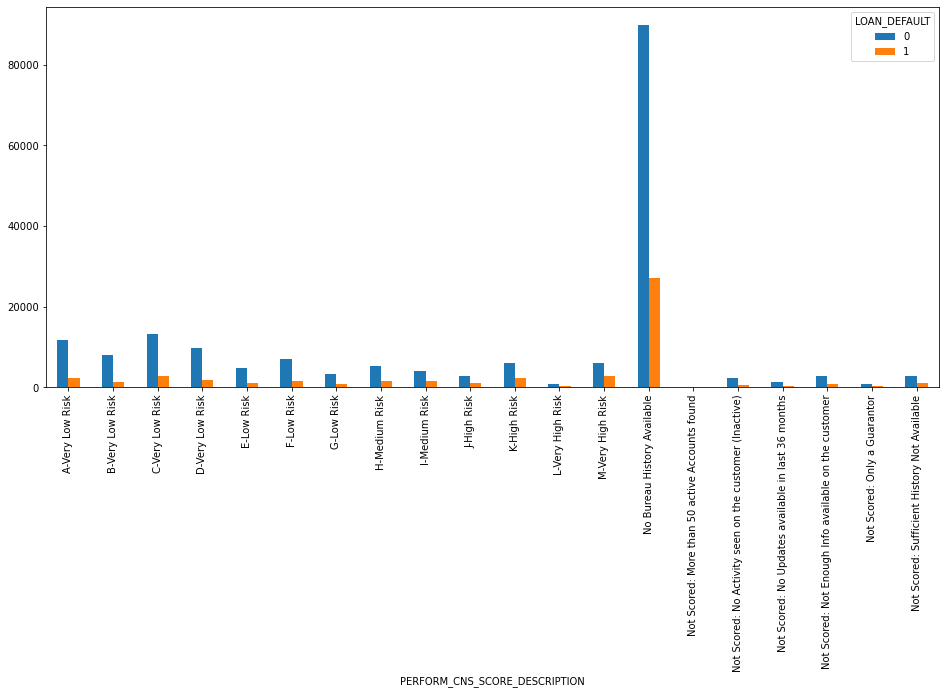

In [81]:
analyze_bivariate_cat_cat('PERFORM_CNS_SCORE_DESCRIPTION')

Statistical test used: Chi_2 contingency
pvalue: 1.1175690611503867e-95
The attributes: NO_OF_INQUIRIES is dependent on LOAN_DEFAULT

BIVARIATE PLOTS: LOAN_DEFAULT Vs NO_OF_INQUIRIES


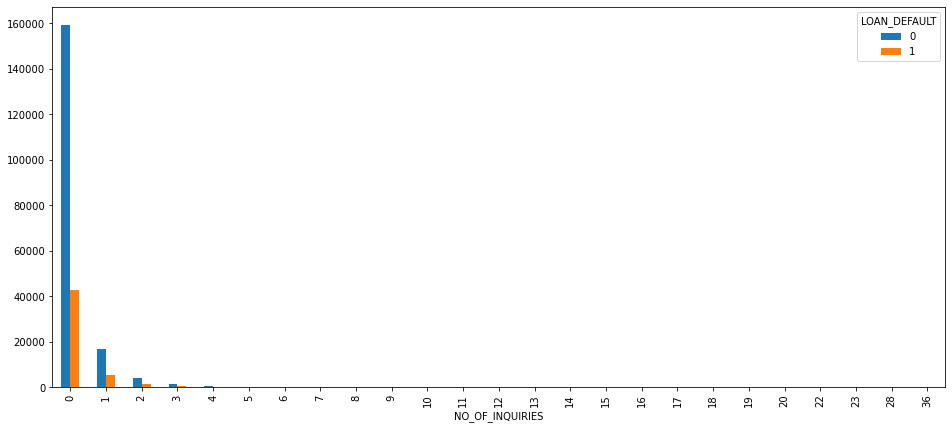

In [82]:
analyze_bivariate_cat_cat('NO_OF_INQUIRIES')

Statistical test used: Chi_2 contingency
pvalue: 3.2916320792270216e-112
The attributes: PRI_OVERDUE_ACCTS is dependent on LOAN_DEFAULT

BIVARIATE PLOTS: LOAN_DEFAULT Vs PRI_OVERDUE_ACCTS


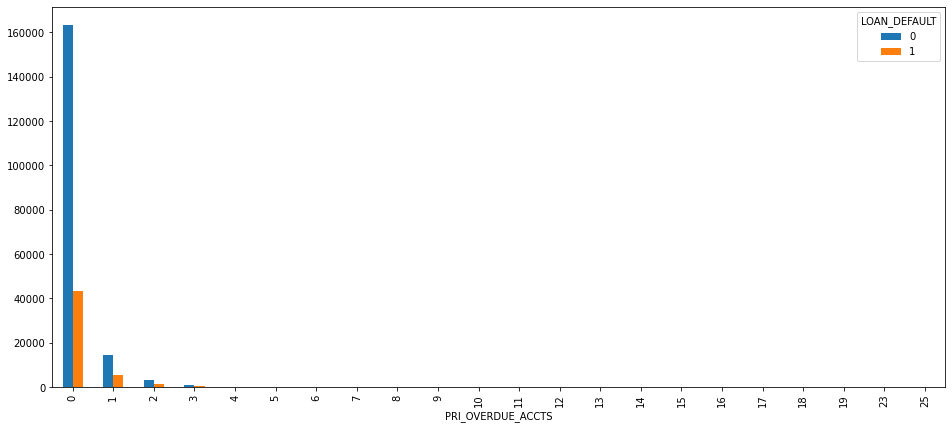

In [83]:
analyze_bivariate_cat_cat('PRI_OVERDUE_ACCTS')

Statistical test used: Chi_2 contingency
pvalue: 3.122542234328496e-42
The attributes: EMPLOYMENT_TYPE is dependent on LOAN_DEFAULT

BIVARIATE PLOTS: LOAN_DEFAULT Vs EMPLOYMENT_TYPE


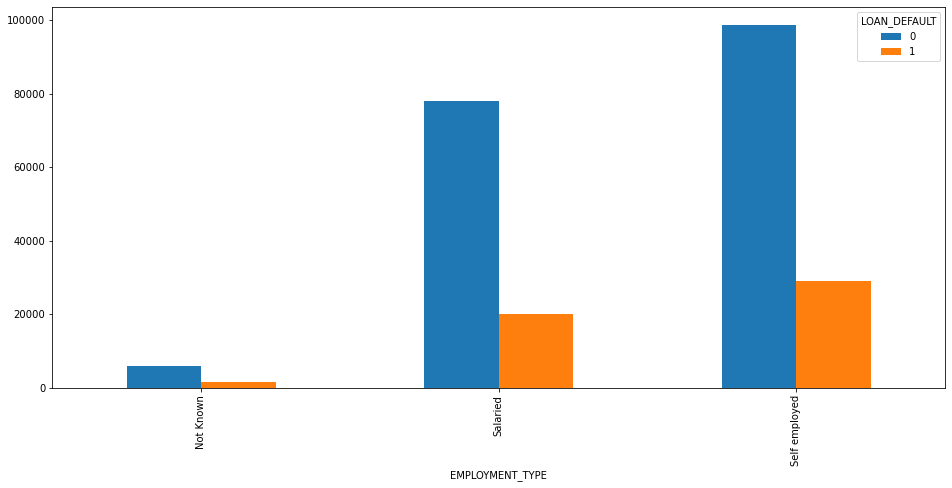

In [84]:
analyze_bivariate_cat_cat('EMPLOYMENT_TYPE')

In [85]:
from sklearn.model_selection import train_test_split


In [86]:
pip install feature_engine

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: patsy>=0.5 in c:\users\hyndu\anaconda3\lib\site-packages (from statsmodels>=0.11.1->feature_engine) (0.5.1)



In [87]:
from feature_engine import transformation as vt


In [88]:
dft=df.copy()

In [89]:
dft.shape

(233154, 41)

In [90]:
dft.head(1)

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,EMPLOYMENT_TYPE,STATE_ID,...,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,AGE,LOAN_AGE
0,420825,50578,58400,89.55,67,22807,45,1441,Salaried,6,...,0,0,0,0,0,0,0,0,37,3


In [91]:
df

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,EMPLOYMENT_TYPE,STATE_ID,...,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,AGE,LOAN_AGE
0,420825,50578,58400,89.55,67,22807,45,1441,Salaried,6,...,0,0,0,0,0,0,0,0,37,3
1,537409,47145,65550,73.23,67,22807,45,1502,Self employed,6,...,1991,0,0,1,23,23,0,1,36,3
2,417566,53278,61360,89.63,67,22807,45,1497,Self employed,6,...,0,0,0,0,0,0,0,0,36,3
3,624493,57513,66113,88.48,67,22807,45,1501,Self employed,6,...,31,0,0,0,8,15,1,1,28,3
4,539055,52378,60300,88.39,67,22807,45,1495,Self employed,6,...,0,0,0,0,0,0,1,1,44,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,63213,105405,60.72,34,20700,48,1050,Salaried,6,...,4084,0,0,0,21,39,0,0,33,3
233150,606141,73651,100600,74.95,34,23775,51,990,Self employed,6,...,1565,0,0,0,6,6,0,0,33,3
233151,613658,33484,71212,48.45,77,22186,86,2299,Salaried,4,...,0,0,0,0,0,0,0,0,45,3
233152,548084,34259,73286,49.10,77,22186,86,2299,Salaried,4,...,0,0,0,0,0,0,0,0,27,3


In [92]:
df['LOAN_DEFAULT'].value_counts()

0    182543
1     50611
Name: LOAN_DEFAULT, dtype: int64

In [93]:
 def analyze_transformation_num_cat(x,y):
    print("Before Transformation")
    f, (ax_box, ax_dist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(x,ax=ax_box)
    sns.distplot(x,ax=ax_dist)
    plt.axvline(x.mean(), color='r')
    plt.axvline(x.median(),color='g')
    plt.show()
    print("Before Transformation Skewness:",x.skew())
    print("")
    print("Checking for skewness with different transformation techniques")
    print('sqrt:',np.sqrt(x).skew())
    print('cube root:',np.cbrt(x).skew())
    
    # Separate into train and test sets
    #X_train, X_test, y_train, y_test = train_test_split(
    #df.drop(labels=['LOAN_DEFAULT'], axis=1),df['LOAN_DEFAULT'],test_size=0.3,random_state=0)
    # set up the variable transformer
    #tf = vt.YeoJohnsonTransformer(variables = 'df')
    #tf.fit(X_train)
    fitted_data2, fitted_lambda2 = stats.yeojohnson(x)
    fitted_data2 = pd.Series(fitted_data2)
    print('yeo-jhonson:',pd.Series(fitted_data2).skew())
  
    print("")
    print("After Transformation")
    f, (ax_box, ax_dist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(fitted_data2,ax=ax_box)
    sns.distplot(fitted_data2,ax=ax_dist)
    plt.axvline(fitted_data2.mean(), color='r')
    plt.axvline(fitted_data2.median(),color='g')
    plt.show()
    print("After Transformation Skewness:",fitted_data2.skew())
    print("The lambda value is",fitted_lambda2)
    print('sqrt:',np.sqrt(x).skew())
    print('cube root:',np.cbrt(x).skew())
    print('yeo-jhonson:',pd.Series(fitted_data2).skew())
    

Before Transformation


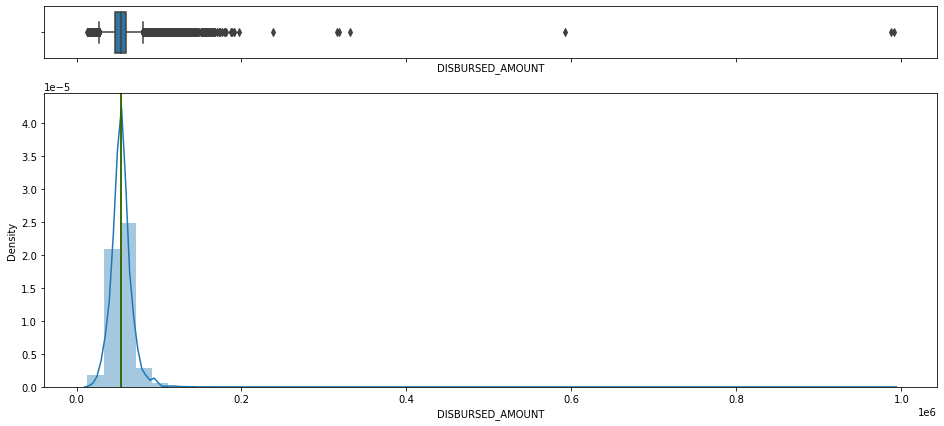

Before Transformation Skewness: 4.4922396638902455

Checking for skewness with different transformation techniques
sqrt: 0.4549834283709752
cube root: 0.08789923057103094
yeo-jhonson: 0

After Transformation


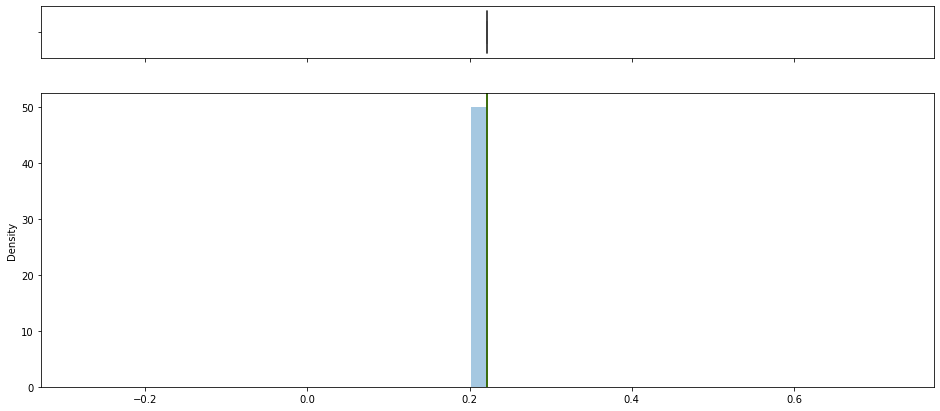

After Transformation Skewness: 0
The lambda value is -4.5057788182158465
sqrt: 0.4549834283709752
cube root: 0.08789923057103094
yeo-jhonson: 0


In [94]:
analyze_transformation_num_cat(df['DISBURSED_AMOUNT'],'DISBURSED_AMOUNT')

Before Transformation


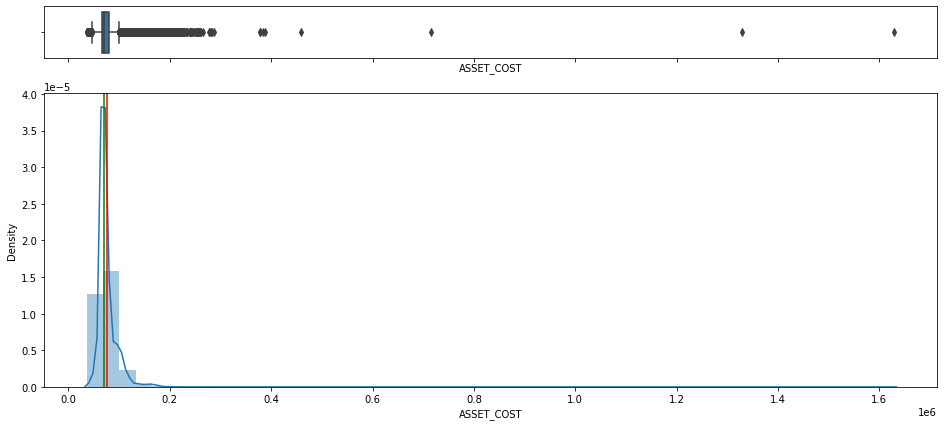

Before Transformation Skewness: 6.133485335511084

Checking for skewness with different transformation techniques
sqrt: 2.0940144395793308
cube root: 1.747627831325944
yeo-jhonson: 0

After Transformation


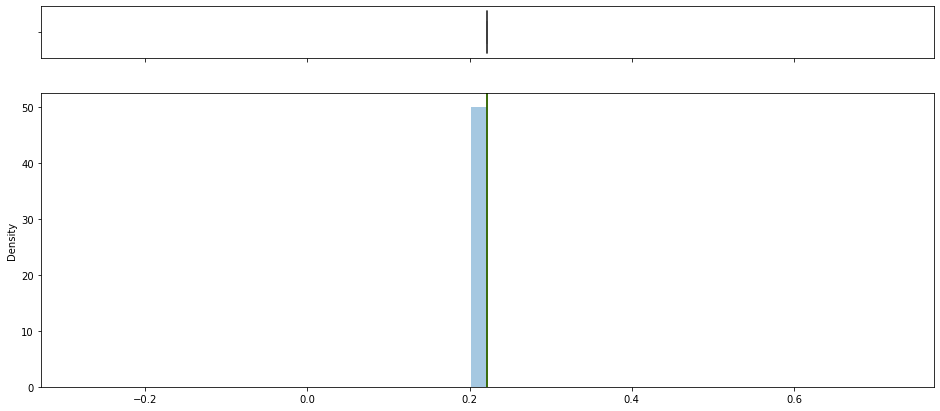

After Transformation Skewness: 0
The lambda value is -4.5057788182158465
sqrt: 2.0940144395793308
cube root: 1.747627831325944
yeo-jhonson: 0


In [95]:
analyze_transformation_num_cat(df['ASSET_COST'],'ASSET_COST')

Before Transformation


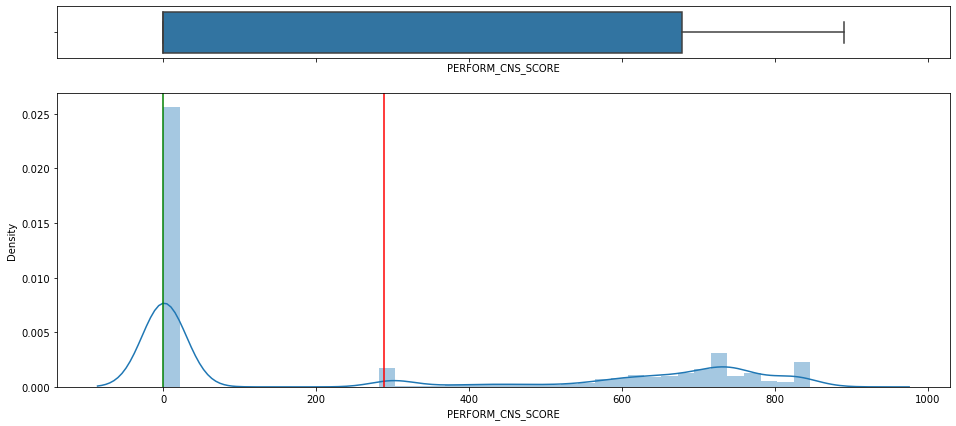

Before Transformation Skewness: 0.44515046415251963

Checking for skewness with different transformation techniques
sqrt: 0.29440417323493945
cube root: 0.22454530867509143
yeo-jhonson: 0.12745898730564234

After Transformation


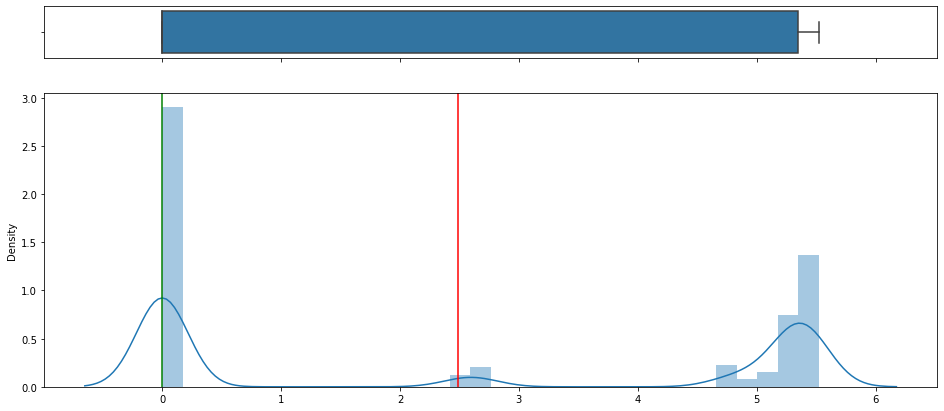

After Transformation Skewness: 0.12745898730564234
The lambda value is -0.06308837796339849
sqrt: 0.29440417323493945
cube root: 0.22454530867509143
yeo-jhonson: 0.12745898730564234


In [96]:
analyze_transformation_num_cat(df['PERFORM_CNS_SCORE'],'PERFORM_CNS_SCORE')

Before Transformation


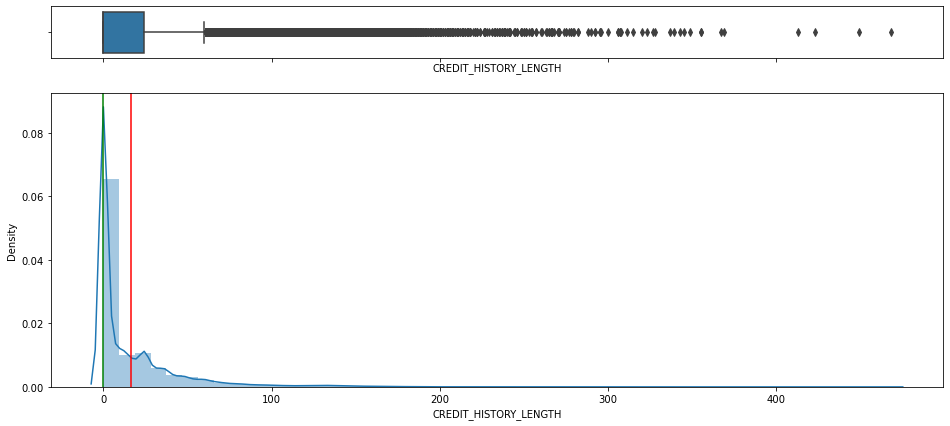

Before Transformation Skewness: 2.9691554540184018

Checking for skewness with different transformation techniques
sqrt: 1.058171884668507
cube root: 0.5591448498787661
yeo-jhonson: 0.2541736585359718

After Transformation


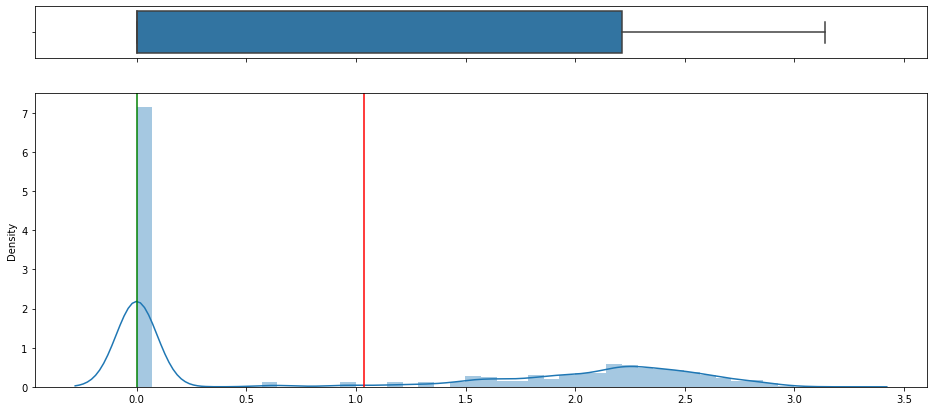

After Transformation Skewness: 0.2541736585359718
The lambda value is -0.2499326900834996
sqrt: 1.058171884668507
cube root: 0.5591448498787661
yeo-jhonson: 0.2541736585359718


In [97]:
analyze_transformation_num_cat(df['CREDIT_HISTORY_LENGTH'],'CREDIT_HISTORY_LENGTH')

Before Transformation


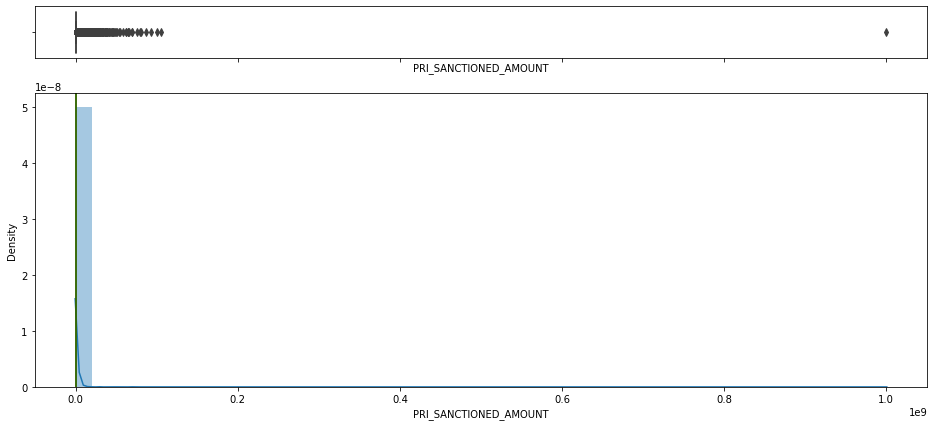

Before Transformation Skewness: 323.69721207047996

Checking for skewness with different transformation techniques
sqrt: 5.851275456958364
cube root: 2.062911107092028
yeo-jhonson: 0.4077641497318435

After Transformation


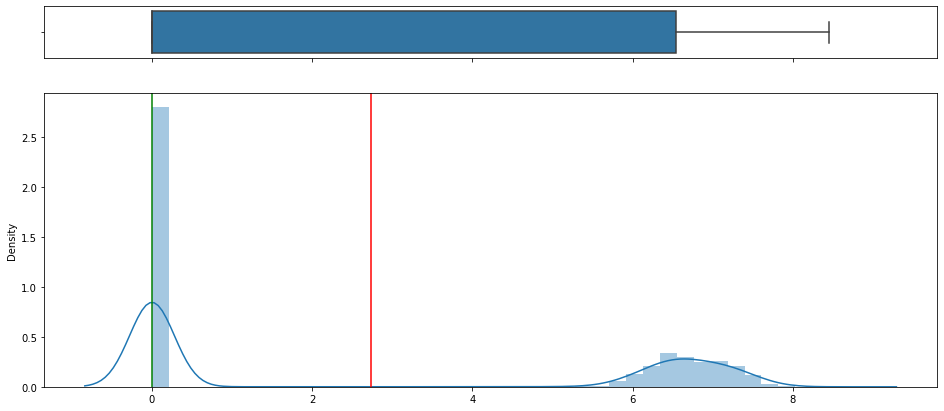

After Transformation Skewness: 0.4077641497318435
The lambda value is -0.10476910618442294
sqrt: 5.851275456958364
cube root: 2.062911107092028
yeo-jhonson: 0.4077641497318435


In [98]:
analyze_transformation_num_cat(df['PRI_SANCTIONED_AMOUNT'],'PRI_SANCTIONED_AMOUNT')

Before Transformation


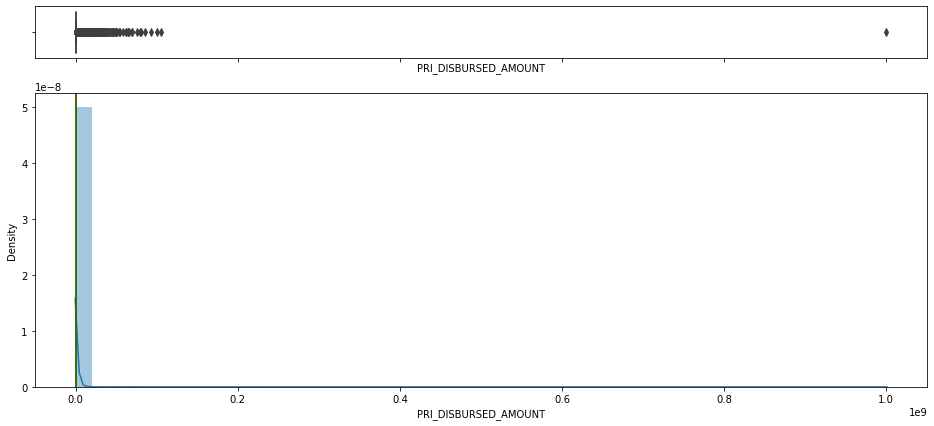

Before Transformation Skewness: 322.54149451016895

Checking for skewness with different transformation techniques
sqrt: 5.880120495514133
cube root: 2.079905352157502
yeo-jhonson: 0.4110647227501709

After Transformation


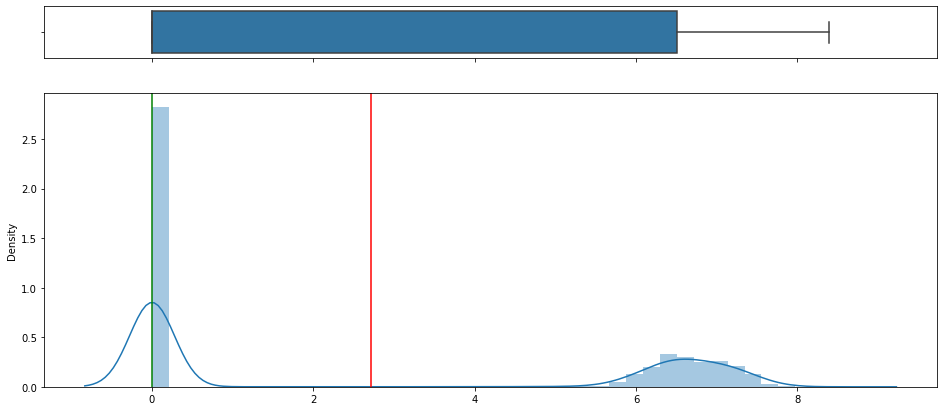

After Transformation Skewness: 0.4110647227501709
The lambda value is -0.10583747277774468
sqrt: 5.880120495514133
cube root: 2.079905352157502
yeo-jhonson: 0.4110647227501709


In [99]:
analyze_transformation_num_cat(df['PRI_DISBURSED_AMOUNT'],'PRI_DISBURSED_AMOUNT')

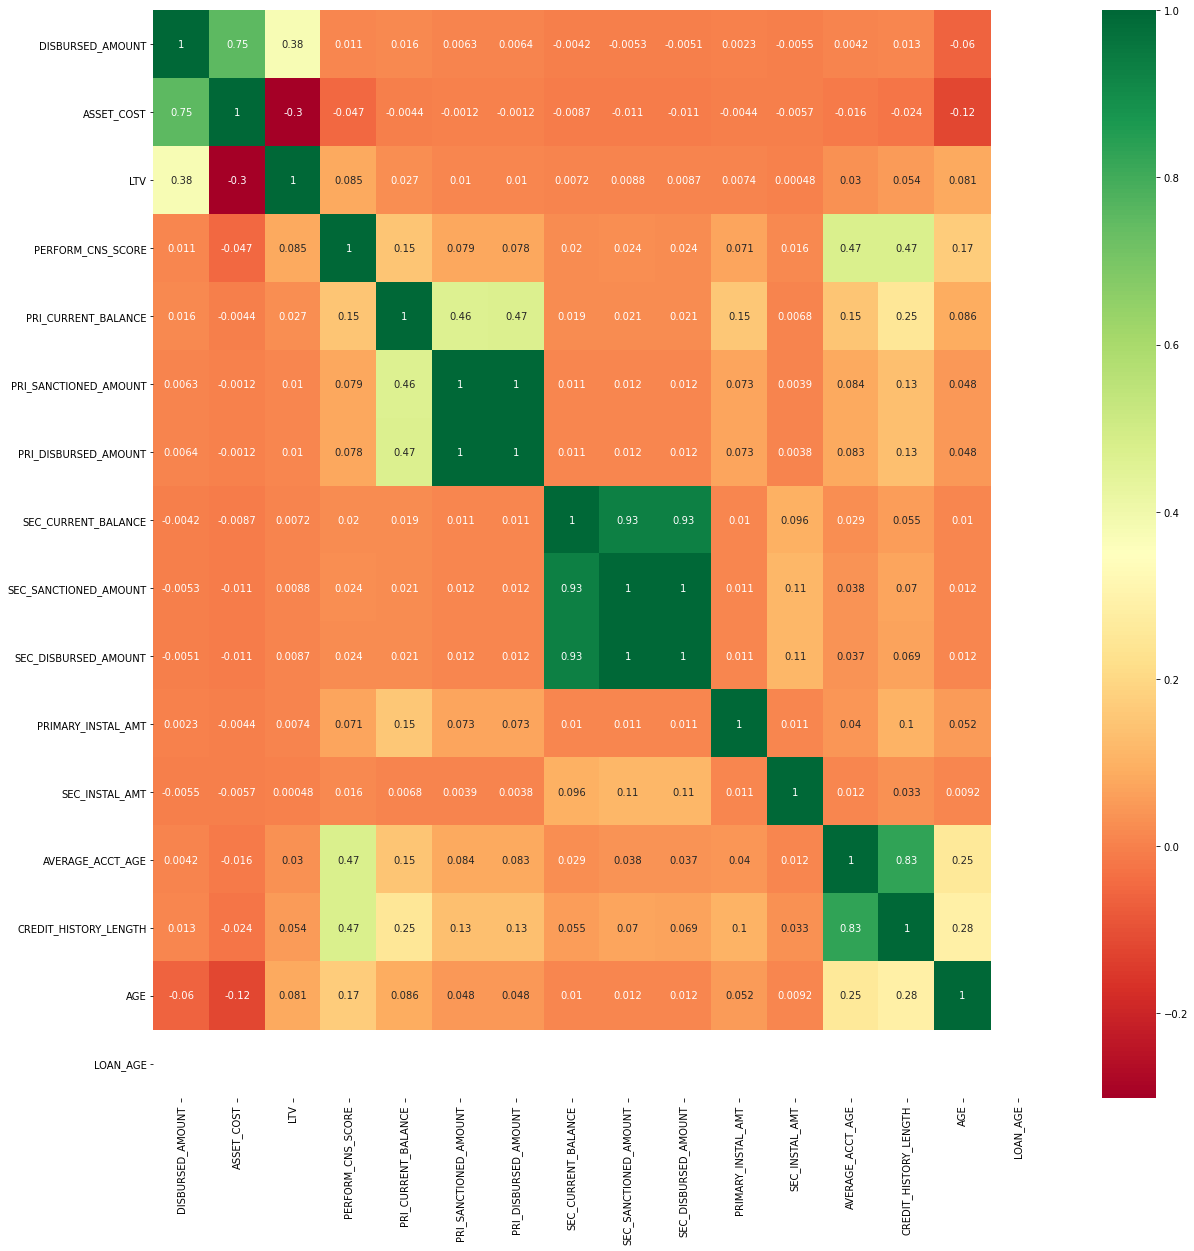

In [100]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [101]:
def analyze_Bivariate_num_cat(x,y):    
    print("Bivariate Analysis")
    plt.figure(figsize=(10,5))
    plt.subplot(2,2,1)
    sns.boxplot(x='LOAN_DEFAULT',y=df,data=dft,whis=2.5)
    plt.title('with transformation')
    plt.subplot(2,2,2)
    sns.boxplot(x='LOAN_DEFAULT',y=x,data=df)
    plt.title('without transformation')
    plt.show()
    
    plt.figure(figsize=(10,5))
    plt.subplot(2,2,3)
    sns.violinplot(x='LOAN_DEFAULT',y=df,data=dft)
    plt.title('with transformation')
    plt.subplot(2,2,4)
    sns.violinplot(x='LOAN_DEFAULT',y=x,data=df)
    plt.title('without transformation')
    plt.show()

In [102]:
# analyze_Bivariate_num_cat(df['DISBURSED_AMOUNT'],'DISBURSED_AMOUNT')

In [103]:
def analyze_statistical_num_cat(x,y):
    
    print("")
    print("Statiscal Test:")
    print("Without Transformation")
    a = df[df['LOAN_DEFAULT']==0][y]
    b = df[df['LOAN_DEFAULT']==1][y]
    print(stats.kruskal(a,b))
    print(stats.mannwhitneyu(a,b,alternative='two-sided'))
    
    print("With Transformation")
    c = dft[dft['LOAN_DEFAULT']==0][y]
    d = dft[dft['LOAN_DEFAULT']==1][y]
    #print(stats.f_oneway(c,d))
    #print(stats.ttest_ind(c,d))
    print(stats.kruskal(c,d))
    print(stats.mannwhitneyu(c,d,alternative='two-sided'))



In [104]:
analyze_statistical_num_cat(df['DISBURSED_AMOUNT'],'DISBURSED_AMOUNT')


Statiscal Test:
Without Transformation
KruskalResult(statistic=2011.5283685855554, pvalue=0.0)
MannwhitneyuResult(statistic=4018447754.5, pvalue=0.0)
With Transformation
KruskalResult(statistic=2011.5283685855554, pvalue=0.0)
MannwhitneyuResult(statistic=4018447754.5, pvalue=0.0)


In [105]:
analyze_statistical_num_cat(df['ASSET_COST'],'ASSET_COST')


Statiscal Test:
Without Transformation
KruskalResult(statistic=69.037977084549, pvalue=9.658554588077986e-17)
MannwhitneyuResult(statistic=4508019941.0, pvalue=9.658557625134653e-17)
With Transformation
KruskalResult(statistic=69.037977084549, pvalue=9.658554588077986e-17)
MannwhitneyuResult(statistic=4508019941.0, pvalue=9.658557625134653e-17)


In [106]:
analyze_statistical_num_cat(df['PERFORM_CNS_SCORE'],'PERFORM_CNS_SCORE')


Statiscal Test:
Without Transformation
KruskalResult(statistic=817.4015389490243, pvalue=8.885946779256795e-180)
MannwhitneyuResult(statistic=4977373811.5, pvalue=8.885956934689523e-180)
With Transformation
KruskalResult(statistic=817.4015389490243, pvalue=8.885946779256795e-180)
MannwhitneyuResult(statistic=4977373811.5, pvalue=8.885956934689523e-180)


In [107]:
analyze_statistical_num_cat(df['PRI_DISBURSED_AMOUNT'],'PRI_DISBURSED_AMOUNT')


Statiscal Test:
Without Transformation
KruskalResult(statistic=325.36472222467603, pvalue=9.826037274051581e-73)
MannwhitneyuResult(statistic=4834377075.0, pvalue=9.826044730426947e-73)
With Transformation
KruskalResult(statistic=325.36472222467603, pvalue=9.826037274051581e-73)
MannwhitneyuResult(statistic=4834377075.0, pvalue=9.826044730426947e-73)


In [108]:
analyze_statistical_num_cat(df['PRI_SANCTIONED_AMOUNT'],'PRI_SANCTIONED_AMOUNT')


Statiscal Test:
Without Transformation
KruskalResult(statistic=348.6276894959477, pvalue=8.432984706633829e-78)
MannwhitneyuResult(statistic=4842000220.5, pvalue=8.43299132752883e-78)
With Transformation
KruskalResult(statistic=348.6276894959477, pvalue=8.432984706633829e-78)
MannwhitneyuResult(statistic=4842000220.5, pvalue=8.43299132752883e-78)


In [109]:
analyze_statistical_num_cat(df['PRI_CURRENT_BALANCE'],'PRI_CURRENT_BALANCE')


Statiscal Test:
Without Transformation
KruskalResult(statistic=256.92695446211974, pvalue=8.023830348162895e-58)
MannwhitneyuResult(statistic=4808464289.5, pvalue=8.023835820040749e-58)
With Transformation
KruskalResult(statistic=256.92695446211974, pvalue=8.023830348162895e-58)
MannwhitneyuResult(statistic=4808464289.5, pvalue=8.023835820040749e-58)


In [110]:
analyze_statistical_num_cat(df['PRIMARY_INSTAL_AMT'],'PRIMARY_INSTAL_AMT')


Statiscal Test:
Without Transformation
KruskalResult(statistic=23.501302898276567, pvalue=1.2482920436379357e-06)
MannwhitneyuResult(statistic=4672891535.0, pvalue=1.2482923284970562e-06)
With Transformation
KruskalResult(statistic=23.501302898276567, pvalue=1.2482920436379357e-06)
MannwhitneyuResult(statistic=4672891535.0, pvalue=1.2482923284970562e-06)


In [111]:
analyze_statistical_num_cat(df['EMPLOYMENT_TYPE'],'EMPLOYMENT_TYPE')


Statiscal Test:
Without Transformation
KruskalResult(statistic=171.8998375452952, pvalue=2.8460083916113508e-39)
MannwhitneyuResult(statistic=4466005511.0, pvalue=2.8460099960818432e-39)
With Transformation
KruskalResult(statistic=171.8998375452952, pvalue=2.8460083916113508e-39)
MannwhitneyuResult(statistic=4466005511.0, pvalue=2.8460099960818432e-39)


In [112]:
analyze_statistical_num_cat(df['PERFORM_CNS_SCORE_DESCRIPTION'],'PERFORM_CNS_SCORE_DESCRIPTION')


Statiscal Test:
Without Transformation
KruskalResult(statistic=690.5570958872054, pvalue=3.3817813914075143e-152)
MannwhitneyuResult(statistic=4290409564.5, pvalue=3.381784946372221e-152)
With Transformation
KruskalResult(statistic=690.5570958872054, pvalue=3.3817813914075143e-152)
MannwhitneyuResult(statistic=4290409564.5, pvalue=3.381784946372221e-152)


In [113]:
analyze_statistical_num_cat(df['NEW_ACCTS_IN_LAST_SIX_MONTHS'],'NEW_ACCTS_IN_LAST_SIX_MONTHS')


Statiscal Test:
Without Transformation
KruskalResult(statistic=256.4733737708454, pvalue=1.0075260702256174e-57)
MannwhitneyuResult(statistic=4774895371.5, pvalue=1.00752690407305e-57)
With Transformation
KruskalResult(statistic=256.4733737708454, pvalue=1.0075260702256174e-57)
MannwhitneyuResult(statistic=4774895371.5, pvalue=1.00752690407305e-57)


In [114]:
analyze_statistical_num_cat(df['PRI_OVERDUE_ACCTS'],'PRI_OVERDUE_ACCTS')


Statiscal Test:
Without Transformation
KruskalResult(statistic=573.7577675105725, pvalue=8.548815082675492e-127)
MannwhitneyuResult(statistic=4443337235.5, pvalue=8.548829041052991e-127)
With Transformation
KruskalResult(statistic=573.7577675105725, pvalue=8.548815082675492e-127)
MannwhitneyuResult(statistic=4443337235.5, pvalue=8.548829041052991e-127)


In [115]:
analyze_statistical_num_cat(df['DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS'],'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS')


Statiscal Test:
Without Transformation
KruskalResult(statistic=337.69811154497614, pvalue=2.0238852710123648e-75)
MannwhitneyuResult(statistic=4504900059.5, pvalue=2.0238882658338392e-75)
With Transformation
KruskalResult(statistic=337.69811154497614, pvalue=2.0238852710123648e-75)
MannwhitneyuResult(statistic=4504900059.5, pvalue=2.0238882658338392e-75)


In [116]:
analyze_statistical_num_cat(df['SEC_OVERDUE_ACCTS'],'SEC_OVERDUE_ACCTS')


Statiscal Test:
Without Transformation
KruskalResult(statistic=1.8015423350286783, pvalue=0.1795261458793187)
MannwhitneyuResult(statistic=4621693771.5, pvalue=0.17952623823636316)
With Transformation
KruskalResult(statistic=1.8015423350286783, pvalue=0.1795261458793187)
MannwhitneyuResult(statistic=4621693771.5, pvalue=0.17952623823636316)


In [117]:
analyze_statistical_num_cat(df['NO_OF_INQUIRIES'],'NO_OF_INQUIRIES')


Statiscal Test:
Without Transformation
KruskalResult(statistic=383.1928883118569, pvalue=2.5108850763265324e-85)
MannwhitneyuResult(statistic=4464365419.5, pvalue=2.5108881884734055e-85)
With Transformation
KruskalResult(statistic=383.1928883118569, pvalue=2.5108850763265324e-85)
MannwhitneyuResult(statistic=4464365419.5, pvalue=2.5108881884734055e-85)


In [118]:
analyze_statistical_num_cat(df['MANUFACTURER_ID'],'MANUFACTURER_ID')


Statiscal Test:
Without Transformation
KruskalResult(statistic=179.85440227618946, pvalue=5.214471240237707e-41)
MannwhitneyuResult(statistic=4787883823.0, pvalue=5.214474037386128e-41)
With Transformation
KruskalResult(statistic=179.85440227618946, pvalue=5.214471240237707e-41)
MannwhitneyuResult(statistic=4787883823.0, pvalue=5.214474037386128e-41)
